---
# SETUP
---

In [198]:
import os
import csv
import json
import pandas as pd
import numpy as np
from datetime import datetime
from tqdm import tqdm

from src.data_collection import GitHubDataCollector
from src.repos_extractor import GitHubRepoExtractor
from src.doc_assessor import GitHubDocAssessor

---
# DATA COLLECTION
---

## 1. Data Scrapping 

### [1.1] Scrap Egyption Users

To overcome the **1,000**-user limit, the script employs a targeted approach:


1. **Date-Based Filtering:**  
Instead of attempting to retrieve all users at once, the search is narrowed down by specific creation dates. The script begins by scraping users created before September 2013 ( `created:2013-09`) then (`created:2013-10`) then (`created:2013-11`), and so on, until now (`created:2024-10`). 

2. **Follower Count Threshold:** The query includes `repos:>0` to specifically target users who have created at least one public repository.


In [2]:
end_point = "https://api.github.com/search/users"

params = {"q": "",
          "per_page": 100,
          "page": 1}

collector = GitHubDataCollector()

In [ ]:
# This script is used to scrape Egyptian users from GitHub.
current_year = 2013
current_month= 8
failed_queries = [] # store unscrapped date to be scrapped again
scrapped_users = []

while current_year <= 2024:
    while current_month <= 12:
        if current_year == 2024 and current_month > 11:
            break  # Stop if Ireach the end month

        if current_year == 2013 and current_month == 8:
            params["q"] = "location:egypt repos:>0 created:<2013-09"

        else:
            params["q"] = f"location:egypt repos:>0 created:{current_year}-{current_month:02}", 
        scrapped_users.append(
            collector.scrap_egy_users(
                        params=params, endpoint=end_point, 
                        date = f"{current_year}-{current_month:02}")
            )

        current_month += 1

    current_month = 1  # Reset month to 1 for the next year
    current_year += 1

Extract 954 Users [2013-08]: Page 10/10 : 100%|██████████| 54/54 [00:00<00:00, 145841.86it/s]


Extract 56 Users [2013-09]: Page 01/1 : 100%|██████████| 56/56 [00:00<00:00, 111741.69it/s]


Extract 45 Users [2013-10]: Page 01/1 : 100%|██████████| 45/45 [00:00<00:00, 129720.74it/s]


Extract 63 Users [2013-11]: Page 01/1 : 100%|██████████| 63/63 [00:00<00:00, 143765.59it/s]


Extract 53 Users [2013-12]: Page 01/1 : 100%|██████████| 53/53 [00:00<00:00, 130533.24it/s]


Extract 61 Users [2014-01]: Page 01/1 : 100%|██████████| 61/61 [00:00<00:00, 94445.38it/s]


Extract 69 Users [2014-02]: Page 01/1 : 100%|██████████| 69/69 [00:00<00:00, 170943.28it/s]


Extract 82 Users [2014-03]: Page 01/1 : 100%|██████████| 82/82 [00:00<00:00, 220752.84it/s]


Extract 77 Users [2014-04]: Page 01/1 : 100%|██████████| 77/77 [00:00<00:00, 213881.73it/s]


Extract 94 Users [2014-05]: Page 01/1 : 100%|██████████| 94/94 [00:00<00:00, 192794.41it/s]


Extract 72 Users [2014-06]: Page 01/1 : 100%|██████████| 72/72 [00:00<00:00, 140199.58it/s]


Extract 63 Users [2014-07]: Page 01/1 : 100%|██████████| 63/63 [00:00<00:00, 149966.60it/s]


Extract 70 Users [2014-08]: Page 01/1 : 100%|██████████| 70/70 [00:00<00:00, 218615.99it/s]


Extract 67 Users [2014-09]: Page 01/1 : 100%|██████████| 67/67 [00:00<00:00, 196791.57it/s]


Extract 102 Users [2014-10]: Page 02/2 : 100%|██████████| 2/2 [00:00<00:00, 7936.24it/s]


Extract 80 Users [2014-11]: Page 01/1 : 100%|██████████| 80/80 [00:00<00:00, 219740.88it/s]


Extract 75 Users [2014-12]: Page 01/1 : 100%|██████████| 75/75 [00:00<00:00, 229615.18it/s]


Extract 100 Users [2015-01]: Page 01/2 : 100%|██████████| 100/100 [00:00<00:00, 201165.66it/s]
Extract 100 Users [2015-01]: Page 02/2 : 0it [00:00, ?it/s]


Extract 130 Users [2015-02]: Page 02/2 : 100%|██████████| 30/30 [00:00<00:00, 118371.70it/s]


Extract 123 Users [2015-03]: Page 02/2 : 100%|██████████| 23/23 [00:00<00:00, 62887.22it/s]


Extract 115 Users [2015-04]: Page 02/2 : 100%|██████████| 15/15 [00:00<00:00, 84335.87it/s]


Extract 98 Users [2015-05]: Page 01/1 : 100%|██████████| 98/98 [00:00<00:00, 49250.15it/s]


Extract 117 Users [2015-06]: Page 02/2 : 100%|██████████| 17/17 [00:00<00:00, 56815.27it/s]


Extract 85 Users [2015-07]: Page 01/1 : 100%|██████████| 85/85 [00:00<00:00, 75533.02it/s]


Extract 116 Users [2015-08]: Page 02/2 : 100%|██████████| 16/16 [00:00<00:00, 82748.29it/s]


Extract 114 Users [2015-09]: Page 02/2 : 100%|██████████| 14/14 [00:00<00:00, 72583.75it/s]


Extract 104 Users [2015-10]: Page 02/2 : 100%|██████████| 4/4 [00:00<00:00, 14004.35it/s]


Extract 128 Users [2015-11]: Page 02/2 : 100%|██████████| 28/28 [00:00<00:00, 149225.56it/s]


Extract 126 Users [2015-12]: Page 02/2 : 100%|██████████| 26/26 [00:00<00:00, 113124.38it/s]


Extract 141 Users [2016-01]: Page 02/2 : 100%|██████████| 41/41 [00:00<00:00, 104411.94it/s]


Extract 203 Users [2016-02]: Page 03/3 : 100%|██████████| 3/3 [00:00<00:00, 16278.02it/s]


Extract 199 Users [2016-03]: Page 02/2 : 100%|██████████| 99/99 [00:00<00:00, 87454.95it/s]


Extract 177 Users [2016-04]: Page 02/2 : 100%|██████████| 77/77 [00:00<00:00, 85124.25it/s]


Extract 128 Users [2016-05]: Page 02/2 : 100%|██████████| 28/28 [00:00<00:00, 61713.35it/s]


Extract 150 Users [2016-06]: Page 02/2 : 100%|██████████| 50/50 [00:00<00:00, 156270.64it/s]


Extract 182 Users [2016-07]: Page 02/2 : 100%|██████████| 82/82 [00:00<00:00, 84462.90it/s]


Extract 198 Users [2016-08]: Page 02/2 : 100%|██████████| 98/98 [00:00<00:00, 66836.06it/s]


Extract 163 Users [2016-09]: Page 02/2 : 100%|██████████| 63/63 [00:00<00:00, 45208.07it/s]


Extract 204 Users [2016-10]: Page 03/3 : 100%|██████████| 4/4 [00:00<00:00, 30727.50it/s]


Extract 209 Users [2016-11]: Page 03/3 : 100%|██████████| 9/9 [00:00<00:00, 67529.04it/s]


Extract 197 Users [2016-12]: Page 02/2 : 100%|██████████| 97/97 [00:00<00:00, 120404.70it/s]


Extract 182 Users [2017-01]: Page 02/2 : 100%|██████████| 82/82 [00:00<00:00, 81810.88it/s]


Extract 219 Users [2017-02]: Page 03/3 : 100%|██████████| 19/19 [00:00<00:00, 95668.40it/s]


Extract 247 Users [2017-03]: Page 03/3 : 100%|██████████| 47/47 [00:00<00:00, 136992.56it/s]


Extract 234 Users [2017-04]: Page 03/3 : 100%|██████████| 34/34 [00:00<00:00, 101067.57it/s]


Extract 168 Users [2017-05]: Page 02/2 : 100%|██████████| 68/68 [00:00<00:00, 78766.27it/s]


Extract 205 Users [2017-06]: Page 03/3 : 100%|██████████| 5/5 [00:00<00:00, 13943.83it/s]


Extract 223 Users [2017-07]: Page 03/3 : 100%|██████████| 23/23 [00:00<00:00, 126599.73it/s]


Extract 246 Users [2017-08]: Page 03/3 : 100%|██████████| 46/46 [00:00<00:00, 166757.12it/s]


Extract 273 Users [2017-09]: Page 03/3 : 100%|██████████| 73/73 [00:00<00:00, 127896.49it/s]


Extract 255 Users [2017-10]: Page 03/3 : 100%|██████████| 55/55 [00:00<00:00, 155031.40it/s]


Extract 254 Users [2017-11]: Page 03/3 : 100%|██████████| 54/54 [00:00<00:00, 179045.39it/s]


Extract 209 Users [2017-12]: Page 03/3 : 100%|██████████| 9/9 [00:00<00:00, 64860.37it/s]


Extract 277 Users [2018-01]: Page 03/3 : 100%|██████████| 77/77 [00:00<00:00, 221814.15it/s]


Extract 372 Users [2018-02]: Page 04/4 : 100%|██████████| 72/72 [00:00<00:00, 198546.93it/s]


Extract 312 Users [2018-03]: Page 04/4 : 100%|██████████| 12/12 [00:00<00:00, 79764.89it/s]


Extract 195 Users [2018-04]: Page 02/2 : 100%|██████████| 95/95 [00:00<00:00, 118307.27it/s]


Extract 169 Users [2018-05]: Page 02/2 : 100%|██████████| 69/69 [00:00<00:00, 32583.54it/s]


Extract 226 Users [2018-06]: Page 03/3 : 100%|██████████| 26/26 [00:00<00:00, 118405.98it/s]


Extract 270 Users [2018-07]: Page 03/3 : 100%|██████████| 70/70 [00:00<00:00, 188811.11it/s]


Extract 203 Users [2018-08]: Page 03/3 : 100%|██████████| 3/3 [00:00<00:00, 20164.92it/s]


Extract 245 Users [2018-09]: Page 03/3 : 100%|██████████| 45/45 [00:00<00:00, 148500.14it/s]


Extract 226 Users [2018-10]: Page 03/3 : 100%|██████████| 26/26 [00:00<00:00, 67902.80it/s]


Extract 207 Users [2018-11]: Page 03/3 : 100%|██████████| 7/7 [00:00<00:00, 38580.98it/s]


Extract 195 Users [2018-12]: Page 02/2 : 100%|██████████| 95/95 [00:00<00:00, 71962.95it/s]


Extract 227 Users [2019-01]: Page 03/3 : 100%|██████████| 27/27 [00:00<00:00, 47343.73it/s]


Extract 267 Users [2019-02]: Page 03/3 : 100%|██████████| 67/67 [00:00<00:00, 172403.91it/s]


Extract 339 Users [2019-03]: Page 04/4 : 100%|██████████| 39/39 [00:00<00:00, 49107.73it/s]


Extract 282 Users [2019-04]: Page 03/3 : 100%|██████████| 82/82 [00:00<00:00, 207688.97it/s]


Extract 198 Users [2019-05]: Page 02/2 : 100%|██████████| 98/98 [00:00<00:00, 94863.10it/s]


Extract 237 Users [2019-06]: Page 03/3 : 100%|██████████| 37/37 [00:00<00:00, 134712.89it/s]


Extract 279 Users [2019-07]: Page 03/3 : 100%|██████████| 79/79 [00:00<00:00, 182361.04it/s]


Extract 273 Users [2019-08]: Page 03/3 : 100%|██████████| 73/73 [00:00<00:00, 123760.79it/s]


Extract 309 Users [2019-09]: Page 04/4 : 100%|██████████| 9/9 [00:00<00:00, 43092.16it/s]


Extract 340 Users [2019-10]: Page 04/4 : 100%|██████████| 40/40 [00:00<00:00, 48321.47it/s]


Extract 299 Users [2019-11]: Page 03/3 : 100%|██████████| 99/99 [00:00<00:00, 111622.61it/s]


Extract 285 Users [2019-12]: Page 03/3 : 100%|██████████| 85/85 [00:00<00:00, 167772.16it/s]


Extract 256 Users [2020-01]: Page 03/3 : 100%|██████████| 56/56 [00:00<00:00, 137598.73it/s]


Extract 377 Users [2020-02]: Page 04/4 : 100%|██████████| 77/77 [00:00<00:00, 111366.00it/s]


Extract 451 Users [2020-03]: Page 05/5 : 100%|██████████| 51/51 [00:00<00:00, 57970.06it/s]


Extract 459 Users [2020-04]: Page 05/5 : 100%|██████████| 59/59 [00:00<00:00, 69473.31it/s]


Extract 357 Users [2020-05]: Page 04/4 : 100%|██████████| 57/57 [00:00<00:00, 112824.60it/s]


Extract 430 Users [2020-06]: Page 05/5 : 100%|██████████| 30/30 [00:00<00:00, 44987.17it/s]


Extract 381 Users [2020-07]: Page 04/4 : 100%|██████████| 81/81 [00:00<00:00, 138161.29it/s]


Extract 320 Users [2020-08]: Page 04/4 : 100%|██████████| 20/20 [00:00<00:00, 27165.18it/s]


Extract 334 Users [2020-09]: Page 04/4 : 100%|██████████| 34/34 [00:00<00:00, 44830.66it/s]


Extract 478 Users [2020-10]: Page 05/5 : 100%|██████████| 78/78 [00:00<00:00, 75538.15it/s]


Extract 443 Users [2020-11]: Page 05/5 : 100%|██████████| 43/43 [00:00<00:00, 53108.09it/s]


Extract 396 Users [2020-12]: Page 04/4 : 100%|██████████| 96/96 [00:00<00:00, 88534.12it/s]


Extract 446 Users [2021-01]: Page 05/5 : 100%|██████████| 46/46 [00:00<00:00, 42144.60it/s]


Extract 279 Users [2021-02]: Page 03/3 : 100%|██████████| 79/79 [00:00<00:00, 84765.93it/s]


Extract 392 Users [2021-03]: Page 04/4 : 100%|██████████| 92/92 [00:00<00:00, 74407.24it/s]


Extract 400 Users [2021-04]: Page 04/5 : 100%|██████████| 100/100 [00:00<00:00, 105411.01it/s]
Extract 400 Users [2021-04]: Page 05/5 : 0it [00:00, ?it/s]


Extract 364 Users [2021-05]: Page 04/4 : 100%|██████████| 64/64 [00:00<00:00, 148470.94it/s]


Extract 331 Users [2021-06]: Page 04/4 : 100%|██████████| 31/31 [00:00<00:00, 45879.82it/s]


Extract 375 Users [2021-07]: Page 04/4 : 100%|██████████| 75/75 [00:00<00:00, 187023.07it/s]


Extract 478 Users [2021-08]: Page 05/5 : 100%|██████████| 78/78 [00:00<00:00, 29096.03it/s]


Extract 473 Users [2021-09]: Page 05/5 : 100%|██████████| 73/73 [00:00<00:00, 63894.86it/s]


Extract 495 Users [2021-10]: Page 05/5 : 100%|██████████| 95/95 [00:00<00:00, 51084.47it/s]


Extract 407 Users [2021-11]: Page 05/5 : 100%|██████████| 7/7 [00:00<00:00, 50796.07it/s]


Extract 492 Users [2021-12]: Page 05/5 : 100%|██████████| 92/92 [00:00<00:00, 124476.12it/s]


Extract 347 Users [2022-01]: Page 04/4 : 100%|██████████| 47/47 [00:00<00:00, 193456.61it/s]


Extract 443 Users [2022-02]: Page 05/5 : 100%|██████████| 43/43 [00:00<00:00, 48600.13it/s]


Extract 570 Users [2022-03]: Page 06/6 : 100%|██████████| 70/70 [00:00<00:00, 196651.90it/s]


Extract 461 Users [2022-04]: Page 05/5 : 100%|██████████| 61/61 [00:00<00:00, 90503.20it/s]


Extract 462 Users [2022-05]: Page 05/5 : 100%|██████████| 62/62 [00:00<00:00, 58345.71it/s]


Extract 376 Users [2022-06]: Page 04/4 : 100%|██████████| 76/76 [00:00<00:00, 96072.06it/s]


Extract 418 Users [2022-07]: Page 05/5 : 100%|██████████| 18/18 [00:00<00:00, 94965.37it/s]


Extract 496 Users [2022-08]: Page 05/5 : 100%|██████████| 96/96 [00:00<00:00, 88223.75it/s]


Extract 460 Users [2022-09]: Page 05/5 : 100%|██████████| 60/60 [00:00<00:00, 69174.89it/s]


Extract 442 Users [2022-10]: Page 05/5 : 100%|██████████| 42/42 [00:00<00:00, 56120.03it/s]


Extract 347 Users [2022-11]: Page 04/4 : 100%|██████████| 47/47 [00:00<00:00, 117761.22it/s]


Extract 372 Users [2022-12]: Page 04/4 : 100%|██████████| 72/72 [00:00<00:00, 214329.23it/s]


Extract 344 Users [2023-01]: Page 04/4 : 100%|██████████| 44/44 [00:00<00:00, 151767.58it/s]


Extract 329 Users [2023-02]: Page 04/4 : 100%|██████████| 29/29 [00:00<00:00, 46800.62it/s]


Extract 291 Users [2023-03]: Page 03/3 : 100%|██████████| 91/91 [00:00<00:00, 137493.39it/s]


Extract 250 Users [2023-04]: Page 03/3 : 100%|██████████| 50/50 [00:00<00:00, 174326.85it/s]


Extract 305 Users [2023-05]: Page 04/4 : 100%|██████████| 5/5 [00:00<00:00, 27521.68it/s]


Extract 232 Users [2023-06]: Page 03/3 : 100%|██████████| 32/32 [00:00<00:00, 161513.51it/s]


Extract 297 Users [2023-07]: Page 03/3 : 100%|██████████| 97/97 [00:00<00:00, 99206.90it/s]


Extract 241 Users [2023-08]: Page 03/3 : 100%|██████████| 41/41 [00:00<00:00, 65411.36it/s]


Extract 212 Users [2023-09]: Page 03/3 : 100%|██████████| 12/12 [00:00<00:00, 12846.26it/s]


Extract 227 Users [2023-10]: Page 03/3 : 100%|██████████| 27/27 [00:00<00:00, 116388.70it/s]


Extract 175 Users [2023-11]: Page 02/2 : 100%|██████████| 75/75 [00:00<00:00, 73826.05it/s]


Extract 201 Users [2023-12]: Page 03/3 : 100%|██████████| 1/1 [00:00<00:00, 7231.56it/s]


Extract 154 Users [2024-01]: Page 02/2 : 100%|██████████| 54/54 [00:00<00:00, 54081.28it/s]


Extract 181 Users [2024-02]: Page 02/2 : 100%|██████████| 81/81 [00:00<00:00, 51389.90it/s]


Extract 156 Users [2024-03]: Page 02/2 : 100%|██████████| 56/56 [00:00<00:00, 65208.50it/s]


Extract 169 Users [2024-04]: Page 02/2 : 100%|██████████| 69/69 [00:00<00:00, 73828.31it/s]


Extract 175 Users [2024-05]: Page 02/2 : 100%|██████████| 75/75 [00:00<00:00, 57477.22it/s]


Extract 145 Users [2024-06]: Page 02/2 : 100%|██████████| 45/45 [00:00<00:00, 27920.66it/s]


Extract 148 Users [2024-07]: Page 02/2 : 100%|██████████| 48/48 [00:00<00:00, 71367.10it/s]


Extract 148 Users [2024-08]: Page 02/2 : 100%|██████████| 48/48 [00:00<00:00, 31885.74it/s]


Extract 130 Users [2024-09]: Page 02/2 : 100%|██████████| 30/30 [00:00<00:00, 99312.64it/s]


Extract 18 Users [2024-10]: Page 01/1 : 100%|██████████| 18/18 [00:00<00:00, 57763.94it/s]


Extract 0 Users [2024-11]: Page 01/1 : 0it [00:00, ?it/s]

In [233]:
users_file_path = "./data/raw/egy_users.csv"
egy_users = pd.read_csv(users_file_path)
print("Egyption GitHub users: ", len(egy_users))

Egyption GitHub users:  33873


### [1.2] Scraping Repositories from Egyptian GitHub Users

Collect GitHub repositories from a list of Egyptian users stored in a CSV file (default: `data/raw/egy_users.csv`) and store the results in another CSV file (default: `data/raw/egy_users_repos.csv`). To handle large datasets and potential interruptions, it uses two strategies:

1. **Skipping rows:**
Often, scraping large datasets can take a long time. If the process is interrupted (e.g., due to a network issue or a timeout), we might want to resume scraping from where it left off. for this purpose i used `skip_rows` parameter to skip the first scrapped rows. 
    * It starts scraping repository from users file from a spacific row number (e.g, 10_000) and continues until it reaches the end of the user list.
    * Now we can parallelize the scarpping process.

2. **Chunking users**: 
Using  `users_limit` to splits the scraping task into smaller chunks, processing a limited number of users at a time, making it possible to parallelize the scraping process.

In [ ]:
collector = GitHubDataCollector()
user_repos = collector.scrap_egy_repos(skip_rows=0, users_limit=10_000)

Scraping Repositores for 10000 Users: 100%|██████████| 10000/10000 [00:00<?, ?it/s]


In [ ]:
user_repos = collector.scrap_egy_repos(skip_rows=10_000, users_limit=10_000)

Scraping Repositores for 10000 Users: 100%|██████████| 10000/10000 [00:00<?, ?it/s]


In [46]:
user_repos = collector.scrap_egy_repos(skip_rows=20_000, users_limit=10_000)

Scraping Repositores for 10000 Users: 100%|██████████| 10000/10000 [00:00<?, ?it/s]


In [45]:
user_repos = collector.scrap_egy_repos(skip_rows=30_000)

Scraping Repositores for 3873 Users: 100%|██████████| 3873/3873 [00:00<?, ?it/s]


### [1.3] Scrapping Most Popular Non-Egyption Repositories

Collect a dataset of top **1000** GitHub repositories, focusing on those that are **not** related to Egypt. In this part, we will scrape the repositories with **more than 1,000 stars**, excluding those associated with Egypt, and save the data to the my default path `data/draft/non_egy_repos.csv`.

In [5]:
params = {
    "q": "stars:>1000 sort:stars",
    "order": "desc",
    "per_page": 100,
    "page": 1,
}

endpoint = "https://api.github.com/search/repositories"
collector = GitHubDataCollector()

In [4]:
collector.scrap_non_egy_repos(
    output_file_path="./data/draft/non_egy_repos1.csv",
    params=params, endpoint=endpoint,
    total_count=1000)

Scrapping Non Egyption Repos: Page[10/10]: 100%|██████████| 1000/1000 [100%] 02:51<00:00


Collect a dataset of top **1000** GitHub repositories, focusing on those that are **not** related to Egypt. In this part, we will scrape the repositories with **less than 10,000 stars**, excluding those associated with Egypt, and save the data to the `non_egy_repos2.csv` file.

In [ ]:
params = {
    "q": "stars:<10000 sort:stars",
    "order": "asc",
    "per_page": 100,
    "page": 1,
}

In [ ]:
collector.scrap_non_egy_repos(
    output_file_path="./data/draft/non_egy_repos2.csv",
    params=params, endpoint=endpoint,
    total_count=1000)

Scrapping Non Egyption Repos: Page[10/10]: 100%|██████████| 1000/1000 [100%] 02:16<00:00


In [48]:
tmp1 = pd.read_csv("./data/draft/non_egy_repos1.csv")
tmp2 = pd.read_csv("./data/draft/non_egy_repos2.csv")
all_non_egy = pd.concat([tmp1, tmp2], axis=0)
all_non_egy.to_csv("./data/raw/non_egy_repos.csv")

### [1.4] Extract the repos that have Egyption contributors

Process a the `non_egy_repos` CSV file containing repository data and identifies repositories with contributions from Egyptian developers. It extracts the names of Egyptian contributors and appends them to the original data in a new column then save the results in file `top_egy_contribs`.



In [25]:
collector = GitHubDataCollector()
collector.extract_egy_contribs(
    input_file_path="./data/draft/non_egy_repos.csv",
    output_file_path="./data/draft/egy_contribs1.csv",
    skip_rows=0)

Checking 30 Contributors for repo [1000/1995]:  50%|█████     | 1000/1995 [00:00<00:00, 361827.47repo/s]


In [17]:
collector.extract_egy_contribs(
    input_file_path="./data/draft/non_egy_repos.csv",
    output_file_path="./data/draft/egy_contribs2.csv",
    skip_rows=1000)

Checking 30 Contributors for repo [2000/2000]: 100%|██████████| 995/995 [00:10<00:00, 98.60repo/s] 


In [27]:
tmp1 = pd.read_csv("./data/draft/egy_contribs1.csv")
tmp2 = pd.read_csv("./data/draft/egy_contribs2.csv")
egy_contribs = pd.concat([tmp1, tmp2], axis=0)
egy_contribs.shape

(10, 13)

In [ ]:
os.makedirs("./data/processed", exist_ok=True)
egy_contribs.to_csv("./data/processed/egy_contribs.csv")

---
## 2. Excusion Criteria for Egyption Repositories

### [2.1] Load all the repos for all Egyption contributors

In [97]:
all_egy_repos = './data/raw/egy_users_repos.csv'
# The low_memory = False parameter prevent pandas to use less memory
# which can lead to errors when reading large files.
repos_df = pd.read_csv(all_egy_repos, low_memory=False)
repos_df.shape

(509332, 11)

In [98]:
repos_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 509332 entries, 0 to 509331
Data columns (total 11 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   owner                  509331 non-null  object
 1   repo_name              509331 non-null  object
 2   repo_html_url          509331 non-null  object
 3   language               377495 non-null  object
 4   topics                 33298 non-null   object
 5   repo_description       259957 non-null  object
 6   open_issues_count      509330 non-null  object
 7   forks_count            509330 non-null  object
 8   stargazers_count       509330 non-null  object
 9   last_repo_commit_date  509330 non-null  object
 10  license                81716 non-null   object
dtypes: object(11)
memory usage: 42.7+ MB


### [2.2] Remove Noise
Clean and Prepare the dataset for of all Egyption repositories for further analysis.

- **Remove nulls `repo_html_url`**
- **Remove Duplicate Repositories:** based on the `repo_html_url` column, ensuring that each repository is represented only once.
- **Convert numerical features:** Convert `stargazers_count` and `forks_count`, to the **integer** data type.
- **Convert string features:** Convert `language`, `license`, ...etc to **categorical** data types.
   

#### Remove NULLs


In [99]:
shape_before = len(repos_df)
print(f"Before removing nullss: {shape_before}")

repos_df.dropna(subset=['repo_html_url'], inplace=True)
repos_df = repos_df.reset_index(drop=True)

print(
    f"After removing nullss: {shape_before - len(repos_df)} rows are removed")

Before removing nullss: 509332
After removing nullss: 1 rows are removed


#### Remove Duplicate Repositories


In [100]:
shape_before = len(repos_df)
print(f"Before removing duplicates: {shape_before}")

repos_df.drop_duplicates(subset=['repo_html_url'], inplace=True)
repos_df = repos_df.reset_index(drop=True)

print(
    f"After removing duplicates: {shape_before - len(repos_df)} rows are removed")

Before removing duplicates: 509331
After removing duplicates: 121364 rows are removed


### [2.3] Exclusion Criteria
Projects are excluded if they meet any of the following conditions:

* **Stargazers count:** Repositories with fewer than 3 stars are excluded.
* **Commit activity:** Repositories without active commits in the past year are excluded.
* **Contributor count:** Repositories with only one contributor are excluded.

#### Exclude repos fewer than 3 stars

In [103]:
print(f"Egyption users count: {len(repos_df)}")

repos_df = repos_df[repos_df['stargazers_count'] >= 3]
repos_df = repos_df.reset_index(drop=True)

print(
    f"Egyption users count after excluded repos with less than 3 stars: {len(repos_df)}")

Egyption users count: 387967
Egyption users count after excluded repos with less than 3 stars: 8852


#### Exclude projects with no active commits in the last year 

In [104]:
last_year = datetime.datetime.now() - datetime.timedelta(days=365)
last_year = last_year.isoformat()

repos_df = repos_df[repos_df['last_repo_commit_date'] >= last_year]
repos_df = repos_df.reset_index(drop=True)

print(
    f"Egyption users count after excluded repos with commits older than one year: {len(repos_df)}")

Egyption users count after excluded repos with commits older than one year: 5471


#### Exclude projects with only one contributors 

In [69]:
extractor = GitHubRepoExtractor()
contribs = []

for index, row in tqdm(repos_df.iterrows(), total=len(repos_df), unit="repo",
                       desc=f"EXtracting contributors count for each repo"):
    contribs.append(extractor.get_contribs_count(row))

repos_df["contribs_count"] = contribs

EXtracting contributors count for each repo: 100%|██████████| 5472/5472 [00:00<00:00, 5675.08repo/s]


In [115]:
before = len(repos_df)
print(f"Egyption users count before contributors filter: {before}")

repos_df = repos_df[repos_df['contribs_count'] > 1]
repos_df = repos_df.reset_index(drop=True)

print(f"Egyption users count after contributors filter: {len(repos_df)}")
print(f"There are {before - len(repos_df)} repos has only one contributor ")

Egyption users count before contributors filter: 5472
Egyption users count after contributors filter: 1579
There are 3893 repos has only one contributor 


In [116]:
repos_df.to_csv("./data/draft/egy_users_filtered_repos.csv", index=False)

---
## 3. Extract Project Details for Further Analysis

### [3.1] Extract Basic Repository Details

The `egy_users_filtered_repos` holds information about repositories that have been carefully selected and filtered based on specific criteria.


In [234]:
repos_df = pd.read_csv("./data/draft/egy_users_filtered_repos.csv")
repos_df.columns

Index(['owner', 'repo_name', 'repo_html_url', 'language', 'topics',
       'repo_description', 'open_issues_count', 'forks_count',
       'stargazers_count', 'last_repo_commit_date', 'license',
       'contribs_count'],
      dtype='object')

In [120]:
extractor = GitHubRepoExtractor()
details_path = "./data/raw/egy_users_repos_details.csv"

dependencies = []
for index, row in tqdm(repos_df.iterrows(), total=len(repos_df),
                       colour='#a569bd',
                       desc="Extracting Repos Details"):
    
    dependencies.append(extractor.extract_repo_details(
        row, output_path=details_path))

Extracting Repos Details: 100%|██████████| 1579/1579 [00:15<00:00, 104.61it/s]


In [ ]:
print("Dependancies Length: ", len(dependencies))

with open("./data/json_files/all_dependencies.json", "w") as f:
    data = json.dump(dependencies, f)

Dependancies Length:  1578


- `egy_users_filtered_repos`: This DataFrame holds information about repositories that have been carefully selected and filtered based on specific criteria.
- `egy_users_repos_details`: This DataFrame represents repositores details that were scraped from GitHub.

### [3.2] Merge all Repos details

In [244]:
filtered_df = pd.read_csv(f"./data/draft/egy_users_filtered_repos.csv")
filter_cols = ['owner', 'repo_name', 'repo_html_url', 'topics','forks_count', 'repo_description', 'stargazers_count', 'last_repo_commit_date', 'license', 'contribs_count']
filtered_df = filtered_df[filter_cols]

print(f"Shape of Filtered Repositories: {filtered_df.shape}")
print("Duplicated rows of Filtered Repositories: ",
      filtered_df.duplicated(subset=["repo_html_url"]).sum())
print("Columns rows of Filtered Repositories: \n", filtered_df.columns)

Shape of Filtered Repositories: (1579, 10)
Duplicated rows of Filtered Repositories:  0
Columns rows of Filtered Repositories: 
 Index(['owner', 'repo_name', 'repo_html_url', 'topics', 'forks_count',
       'repo_description', 'stargazers_count', 'last_repo_commit_date',
       'license', 'contribs_count'],
      dtype='object')


In [245]:
details = pd.read_csv(f"./data/raw/egy_users_repos_details.csv")
print("Shape Details DataFrame: ", details.shape)
print("Duplicated rows of Details DataFrame: ",
      details.duplicated(subset=["repo_html_url"]).sum())
print("Columns rows of Details DataFrame: \n", details.columns)

Shape Details DataFrame:  (1579, 17)
Duplicated rows of Details DataFrame:  0
Columns rows of Details DataFrame: 
 Index(['owner', 'repo_name', 'repo_html_url', 'language', 'commits_count',
       'open_issues', 'closed_issues', 'open_pull_requests',
       'closed_pull_requests', 'merged_pull_requests', 'tags', 'doc_files',
       'cicd_files', 'db_files', 'api_files', 'ci_cd_tool', 'database_types'],
      dtype='object')


In [246]:
merged_df = pd.merge(filtered_df, details, on=[
                     'owner', 'repo_name', 'repo_html_url'], how='left')
print("Shape of Merged DataFrame:", merged_df.shape)
print("Duplicated rows of Merged DataFrame: ",
      merged_df.duplicated(subset=["repo_html_url"]).sum())
print("Columns rows of Merged DataFrame: \n", merged_df.columns)

Shape of Merged DataFrame: (1579, 24)
Duplicated rows of Merged DataFrame:  0
Columns rows of Merged DataFrame: 
 Index(['owner', 'repo_name', 'repo_html_url', 'topics', 'forks_count',
       'repo_description', 'stargazers_count', 'last_repo_commit_date',
       'license', 'contribs_count', 'language', 'commits_count', 'open_issues',
       'closed_issues', 'open_pull_requests', 'closed_pull_requests',
       'merged_pull_requests', 'tags', 'doc_files', 'cicd_files', 'db_files',
       'api_files', 'ci_cd_tool', 'database_types'],
      dtype='object')


In [247]:
# merged_df.to_csv("./data/raw/egy_users_repos_all_details.csv", index=False)
merged_df.to_csv("./data/raw/egy_users_repos_all_details.csv", index=False)

### [3.3] Extract Needed Owner Profile Details

In [6]:
github_api = GitHubAPI()
user_profiles = pd.DataFrame(columns=github_api.profile_keys)

for index, row in tqdm(merged_df.iterrows(), total=len(merged_df),
                       colour='#FFA07A', bar_format="{l_bar}{bar}| {n_fmt}/{total_fmt} {rate_fmt}{postfix}",
                       desc="Extracting Users Profile Details"):

    profile = github_api.get_profile(username=row['owner'])

    # Append the profile to the user_profiles DataFrame
    user_profiles.loc[index] = profile

Extracting Users Profile Details:   0%|          | 0/1579 ?it/s

Extracting Users Profile Details: 100%|██████████| 1579/1579  2.29it/s


In [33]:
user_profiles = user_profiles.rename(columns={
    "login": "owner",
    "created_at": "profile_created_at",
    "updated_at": "profile_updated_at",
})
user_profiles.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1579 entries, 0 to 1578
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   owner               1578 non-null   object 
 1   name                1549 non-null   object 
 2   location            1578 non-null   object 
 3   email               743 non-null    object 
 4   bio                 1241 non-null   object 
 5   public_repos        1578 non-null   float64
 6   public_gists        1578 non-null   float64
 7   followers           1578 non-null   float64
 8   following           1578 non-null   float64
 9   profile_created_at  1578 non-null   object 
 10  profile_updated_at  1578 non-null   object 
dtypes: float64(4), object(7)
memory usage: 148.0+ KB


In [34]:
user_profiles.to_csv("./data/raw/egy_users_profiles.csv", index=False)

### [3.4] Merge all Extracted Info and Save Final Dataset for Analysis

In [248]:
user_profiles = pd.read_csv("data/raw/egy_users_profiles.csv")
user_profiles = user_profiles.drop("owner", axis=1)
print(user_profiles.shape)
user_profiles.columns

(1579, 10)


Index(['name', 'location', 'email', 'bio', 'public_repos', 'public_gists',
       'followers', 'following', 'profile_created_at', 'profile_updated_at'],
      dtype='object')

In [249]:
merged_df = pd.read_csv("data/raw/egy_users_repos_all_details.csv") # egy_users_repos_all_details
print(merged_df.shape)
merged_df.columns

(1579, 24)


Index(['owner', 'repo_name', 'repo_html_url', 'topics', 'forks_count',
       'repo_description', 'stargazers_count', 'last_repo_commit_date',
       'license', 'contribs_count', 'language', 'commits_count', 'open_issues',
       'closed_issues', 'open_pull_requests', 'closed_pull_requests',
       'merged_pull_requests', 'tags', 'doc_files', 'cicd_files', 'db_files',
       'api_files', 'ci_cd_tool', 'database_types'],
      dtype='object')

In [250]:
all_data = pd.concat([merged_df, user_profiles], axis=1)
print(all_data.shape)
all_data.columns

(1579, 34)


Index(['owner', 'repo_name', 'repo_html_url', 'topics', 'forks_count',
       'repo_description', 'stargazers_count', 'last_repo_commit_date',
       'license', 'contribs_count', 'language', 'commits_count', 'open_issues',
       'closed_issues', 'open_pull_requests', 'closed_pull_requests',
       'merged_pull_requests', 'tags', 'doc_files', 'cicd_files', 'db_files',
       'api_files', 'ci_cd_tool', 'database_types', 'name', 'location',
       'email', 'bio', 'public_repos', 'public_gists', 'followers',
       'following', 'profile_created_at', 'profile_updated_at'],
      dtype='object')

In [251]:
os.makedirs("./data/processed", exist_ok=True)
all_data.to_csv("./data/processed/egyption_github_data.csv", index=False)

--- 
# DATA ANALYSIS AND VISUALIZATION 
---


In [453]:
import ast
import matplotlib.pyplot as plt
import seaborn as sns
from src import utils

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

pd.set_option('display.max_colwidth', 30)

palette_color = sns.color_palette("RdBu", 20)
sns.set_theme(style="whitegrid", palette=palette_color)
palette_color

[(0.5423298731257209, 0.044290657439446365, 0.1437139561707036),
 (0.6807381776239907, 0.08858131487889273, 0.16585928489042678),
 (0.7561707035755478, 0.21038062283737025, 0.22352941176470587),
 (0.8226066897347174, 0.34325259515570933, 0.28627450980392155),
 (0.8807381776239908, 0.4719723183391003, 0.3753171856978085),
 (0.940715109573241, 0.6099192618223759, 0.4812764321414839),
 (0.9686274509803922, 0.7176470588235293, 0.5999999999999999),
 (0.9852364475201846, 0.8173010380622837, 0.7273356401384083),
 (0.9856978085351787, 0.8889657823913879, 0.8320645905420992),
 (0.9746251441753172, 0.940638216070742, 0.9206459054209919),
 (0.930642060745867, 0.9506343713956171, 0.9616301422529796),
 (0.8605151864667436, 0.9174163783160324, 0.9487120338331411),
 (0.7711649365628607, 0.8734332948865823, 0.9273356401384084),
 (0.654901960784314, 0.8143790849673205, 0.8941176470588236),
 (0.530026912725875, 0.7456362937331797, 0.8560553633217994),
 (0.37208765859284904, 0.6456747404844292, 0.8020761245674741),
 (0.24705882352941178, 0.5557093425605536, 0.7540945790080738),
 (0.1843137254901961, 0.47266435986159167, 0.7116493656286044),
 (0.1229527104959631, 0.3875432525951557, 0.6572087658592849),
 (0.071280276816609, 0.2878892733564014, 0.518800461361015)]

---
### Load and prepare the dataset to analyze 

In [374]:
all_data_path = "./data/processed/egyption_github_data.csv"
data = pd.read_csv(all_data_path)
data.shape

(1579, 34)

In [375]:
for feat in data.columns:
    print(f"Num of unique values in {feat:22}:  ", data[feat].nunique())

Num of unique values in owner                 :   1081
Num of unique values in repo_name             :   1539
Num of unique values in repo_html_url         :   1579
Num of unique values in topics                :   684
Num of unique values in forks_count           :   97
Num of unique values in repo_description      :   1307
Num of unique values in stargazers_count      :   196
Num of unique values in last_repo_commit_date :   1568
Num of unique values in license               :   18
Num of unique values in contribs_count        :   25
Num of unique values in language              :   43
Num of unique values in commits_count         :   30
Num of unique values in open_issues           :   25
Num of unique values in closed_issues         :   32
Num of unique values in open_pull_requests    :   19
Num of unique values in closed_pull_requests  :   32
Num of unique values in merged_pull_requests  :   32
Num of unique values in tags                  :   193
Num of unique values in doc_files

### Data Cleaning

**Convert Date Feature to list**

In [376]:
lised_feature = ['doc_files', 'cicd_files', 'db_files', 'api_files', 'ci_cd_tool' ,'database_types','tags']

data[lised_feature] = data[lised_feature].fillna("[]")

for feat in lised_feature:
    data[feat] = data[feat].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

data[lised_feature].dtypes

doc_files         object
cicd_files        object
db_files          object
api_files         object
ci_cd_tool        object
database_types    object
tags              object
dtype: object

**Convert Date Feature to Python String**

In [377]:
str_features = ['owner', 'repo_name', 'repo_html_url', 'topics', 'repo_description',
                'license', 'language',  'name', 'location', 'email', 'bio']

data = data.astype({col: 'string' for col in str_features}).fillna('')
data[str_features].dtypes

owner               string[python]
repo_name           string[python]
repo_html_url       string[python]
topics              string[python]
repo_description    string[python]
license             string[python]
language            string[python]
name                string[python]
location            string[python]
email               string[python]
bio                 string[python]
dtype: object

**Convert Date Feature to int8**

In [378]:
int_features = ['commits_count', 'forks_count', 'stargazers_count', 'open_issues', 'public_repos', 'public_gists',
                'followers', 'following', 'closed_issues', 'open_pull_requests', 'closed_pull_requests', 'merged_pull_requests']

data[int_features] = data[int_features].applymap(pd.to_numeric).fillna(-1).astype(int)
data[int_features].dtypes

commits_count           int64
forks_count             int64
stargazers_count        int64
open_issues             int64
public_repos            int64
public_gists            int64
followers               int64
following               int64
closed_issues           int64
open_pull_requests      int64
closed_pull_requests    int64
merged_pull_requests    int64
dtype: object

> `-1` indicates to NaN (No response from GitHub API)

**Convert Date Feature to Datetime**

In [379]:
date_features = ['last_repo_commit_date','profile_created_at', 'profile_updated_at']

for feat in date_features:
    # Step 1: Ensure the column is treated as a string
    data[feat] = data[feat].astype(str)
    # Step 2: Clean the data (removing extra spaces if any)
    data[feat] = data[feat].str.replace('T', ' ').str.replace('Z', '+00:00')
    # Step 3: Convert to datetime, catching any errors
    data[feat] = pd.to_datetime(data[feat], errors='coerce')


**Create new date features**

In [380]:
# Extract year and month from the last_repo_commit_date
data['commit_year'] = data['last_repo_commit_date'].dt.year
data['commit_month'] = data['last_repo_commit_date'].dt.month
data['commit_month_name'] = data['last_repo_commit_date'].dt.month_name()

In [381]:
missing = data.isna().sum()
missing[missing>0]

profile_created_at    1
profile_updated_at    1
dtype: int64

### draft

In [382]:
print("There is a %d" % data['open_pull_requests'].nunique(), 
      "unique values in open_pull_requests column:\n", data['open_pull_requests'].unique())

print("There is a %d" % data['closed_pull_requests'].nunique(), 
      "unique values in closed_pull_requests column:\n", data['closed_pull_requests'].unique())

print("There is a %d" % data['merged_pull_requests'].nunique(), 
      "unique values in merged_pull_requests column:\n", data['merged_pull_requests'].unique())

There is a 19 unique values in open_pull_requests column:
 [ 0 -1 23  1  8 10 22 21  5  2  4  3 18  6 12 11 20  9  7]
There is a 32 unique values in closed_pull_requests column:
 [ 1 -1  6  7  4 20  2  5 25 19  8 30  3 14 15  0 10 12 28 13 29 26  9 21
 18 11 22 27 24 16 23 17]
There is a 32 unique values in merged_pull_requests column:
 [ 1 -1  6  3  4 17  2  0  5 15 30  8 27 28 10  7 14 12 22 16  9 29 23 20
 18 24 21 11 19 13 26 25]


In [383]:
print("There is a %d" % data['open_issues'].nunique(), 
      "unique values in open_issues column:\n", data['open_issues'].unique())
      
      
print("There is a %d" % data['closed_issues'].nunique(), 
      "unique values in closed_issues column:\n", data['closed_issues'].unique())

There is a 25 unique values in open_issues column:
 [ 0 -1  3  2  1 23  9  8 11 22 21  7  5  4 14 26 18  6 13 10 12 20 24 25
 15]
There is a 32 unique values in closed_issues column:
 [ 1 -1 11  3 20  0  7  8 14  2 26 19 30  4  5  6 21 25 17 12 10 15 28 13
  9 29 16 23 18 22 24 27]


---
### Question 1:  Geographic Distribution of Contributors

**Which Egyptian Cities or Areas have the most open source contribution?**

**Solution Steps:**

* Using the `location` data extracted from GitHub user profiles to extract the city name for it. 
* Mapping the cities to wider region (e.g., Upper Egypt, Northern Coast, etc.)
* Perform an in-depth analysis of the distribution with the help of a bar plot.

In [312]:
data['location'].isna().sum()

0

In [313]:
data['location'].nunique()

169

In [314]:
# List of variations to normalize to 'Egypt'
egypt_variations = ['Egypt', 'egypt', 'egypt ', 'EGYPt', 'Egypt ', 'EGYPT',
                    'مِڝْڔُ - Egypt', 'somewhere in Egypt', 'Egypt - مصر', 'Egypt 🇪🇬 ']

# Apply a lambda function to replace all variations with 'Egypt'
data['location'] = data['location'].apply(lambda x: 'Egypt' if x in egypt_variations else x)

In [315]:
data['location'].nunique()

160

#### Extract the City from Location

In [316]:
data['city'] = data['location'].apply(utils.extract_city)

In [317]:
print("Number of Unique cities: ", data['city'].nunique())

Number of Unique cities:  84


In [318]:
with open("./data/json_files/typo_mapping.json", "r") as file:
    typo_mapping = json.load(file)

In [319]:
data['city'] = data['city'].apply(lambda x: typo_mapping.get(x, x))
print(f"Number of uniques cities: {data['city'].nunique()}")

Number of uniques cities: 25


#### Group repositories by city and count occurrences

In [320]:
# Group repositories by city and count occurrences
all_cities = pd.DataFrame(data[['city']].value_counts()).reset_index()
all_cities

,city,count
0,Egypt,740
1,Cairo,511
2,Alexanderia,131
3,Giza,71
4,Dakahlia,24
5,Alsharqia,14
6,Abroad,13
7,Port Said,11
8,Gharbia,10
9,Sinai,9


/root/miniconda3/envs/egy_opensource/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead

/root/miniconda3/envs/egy_opensource/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead

/root/miniconda3/envs/egy_opensource/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead



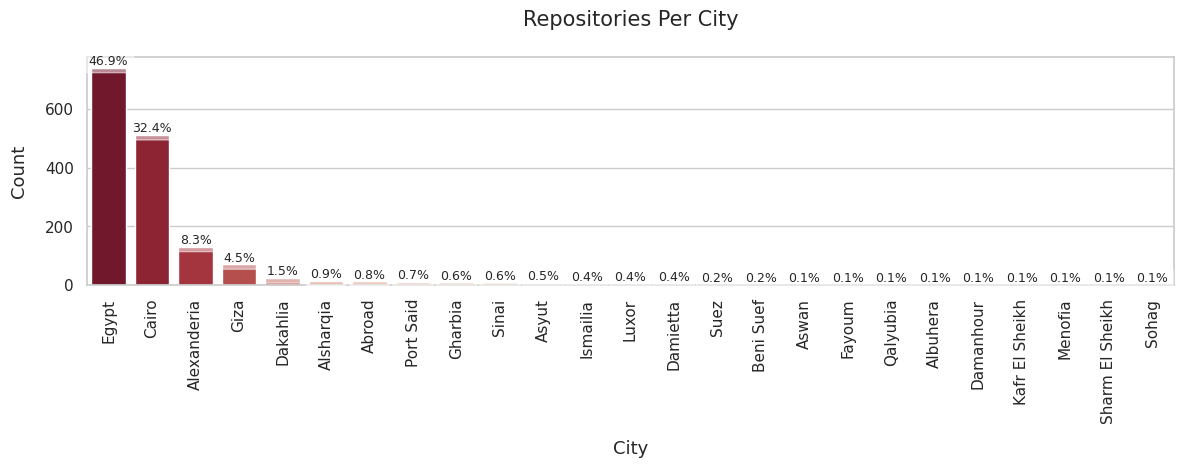

In [321]:
utils.bar_plot(all_cities, fontsize=13)

#### Map Cities into Wider Regions

In [322]:
# Define the region mapping
region_mapping = {
    'Greater Cairo': ['Cairo', 'Giza', 'Qalyubia'],
    'Northern Coast': ['Alexanderia', 'Albuhera', 'Damanhour', 'Kafr El Sheikh'],
    'Canal Cities': ['Port Said', 'Ismailia', 'Suez'],
    'Nile Delta': ['Dakahlia', 'Alsharqia', 'Gharbia', 'Damietta', 'Menofia'],
    'Upper Egypt': ['Asyut', 'Beni Suef', 'Fayoum', 'Sohag', 'Luxor', 'Aswan', 'Sinai', 'Sharm El Sheikh'],
    'others': ['Abroad']
}


def get_region(city):
    for region, cities in region_mapping.items():
        if city in cities:
            return region
    return 'Egypt'

In [323]:
# apply the function also on the orginal dataset
data['region'] = data['city'].apply(get_region)

In [324]:
all_cities['region'] = all_cities['city'].apply(get_region)
all_cities

,city,count,region
0,Egypt,740,Egypt
1,Cairo,511,Greater Cairo
2,Alexanderia,131,Northern Coast
3,Giza,71,Greater Cairo
4,Dakahlia,24,Nile Delta
5,Alsharqia,14,Nile Delta
6,Abroad,13,others
7,Port Said,11,Canal Cities
8,Gharbia,10,Nile Delta
9,Sinai,9,Upper Egypt


In [325]:
all_regions = all_cities.groupby('region')['count'].sum().reset_index()
all_regions = all_regions.sort_values(by='count', ascending=False)
all_regions

,region,count
1,Egypt,740
2,Greater Cairo,584
4,Northern Coast,134
3,Nile Delta,55
5,Upper Egypt,32
0,Canal Cities,20
6,others,13


/root/miniconda3/envs/egy_opensource/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead

/root/miniconda3/envs/egy_opensource/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead

/root/miniconda3/envs/egy_opensource/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead



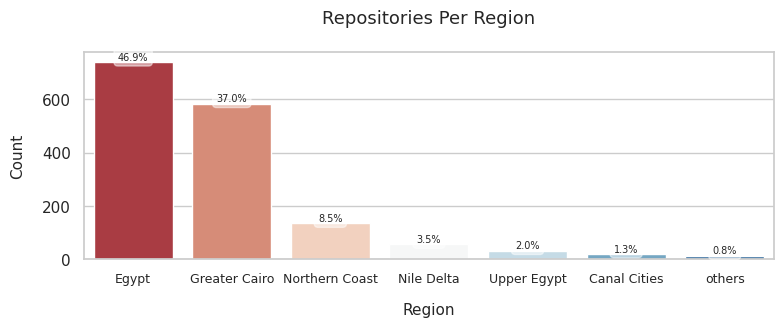

In [326]:
utils.bar_plot(all_regions,figsize=(8, 3.5), rotation=0, fontsize=11)

#### Look Closely to `Upper Egypt` Cities

In [327]:
tmp = all_cities[all_cities['region'] == 'Upper Egypt']
tmp = tmp.rename(columns={'city': 'upper egypt city'})
tmp

,upper egypt city,count,region
9,Sinai,9,Upper Egypt
10,Asyut,8,Upper Egypt
12,Luxor,6,Upper Egypt
15,Beni Suef,3,Upper Egypt
16,Aswan,2,Upper Egypt
17,Fayoum,2,Upper Egypt
23,Sharm El Sheikh,1,Upper Egypt
24,Sohag,1,Upper Egypt


/root/miniconda3/envs/egy_opensource/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead

/root/miniconda3/envs/egy_opensource/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead

/root/miniconda3/envs/egy_opensource/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead



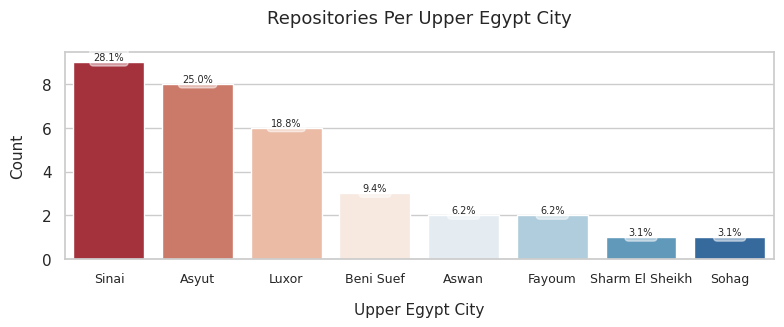

In [328]:
utils.bar_plot(tmp,  figsize=(8, 3.5), rotation=0, fontsize=11)

#### Look Closely to `Northern Coast` Cities

In [329]:
tmp = all_cities[all_cities['region'] == 'Northern Coast']
tmp = tmp.rename(columns={'city': 'northern coast city'})
tmp

,northern coast city,count,region
2,Alexanderia,131,Northern Coast
19,Albuhera,1,Northern Coast
20,Damanhour,1,Northern Coast
21,Kafr El Sheikh,1,Northern Coast


/root/miniconda3/envs/egy_opensource/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead

/root/miniconda3/envs/egy_opensource/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead

/root/miniconda3/envs/egy_opensource/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead



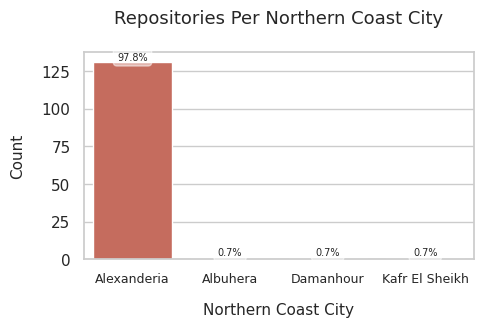

In [330]:
utils.bar_plot(tmp, figsize=(5, 3.5), rotation=0, fontsize=11)

#### Look Closely to `Nile Delta` cities

In [331]:
tmp = all_cities[all_cities['region'] == 'Nile Delta']
tmp = tmp.rename(columns={'city': 'nile delta city'})
tmp

,nile delta city,count,region
4,Dakahlia,24,Nile Delta
5,Alsharqia,14,Nile Delta
8,Gharbia,10,Nile Delta
13,Damietta,6,Nile Delta
22,Menofia,1,Nile Delta


/root/miniconda3/envs/egy_opensource/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead

/root/miniconda3/envs/egy_opensource/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead

/root/miniconda3/envs/egy_opensource/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead



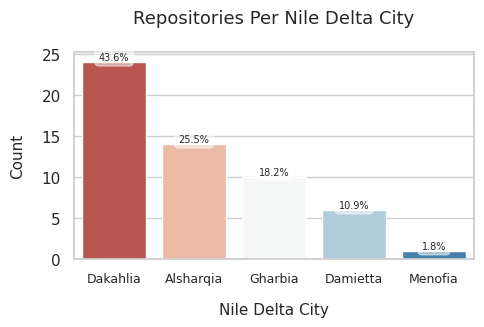

In [332]:
utils.bar_plot(tmp, figsize=(5, 3.5), rotation=0, fontsize=11)

#### Look Closely to `Canal` Cities

In [333]:
tmp = all_cities[all_cities['region'] == 'Canal Cities']
tmp = tmp.rename(columns={'city': 'canal city'})
tmp

,canal city,count,region
7,Port Said,11,Canal Cities
11,Ismailia,6,Canal Cities
14,Suez,3,Canal Cities


/root/miniconda3/envs/egy_opensource/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead

/root/miniconda3/envs/egy_opensource/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead

/root/miniconda3/envs/egy_opensource/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead



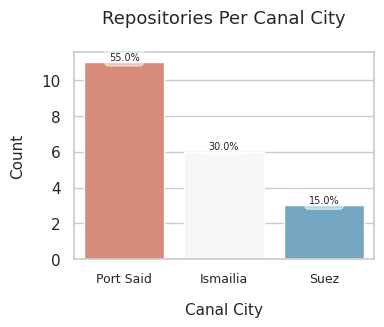

In [334]:
utils.bar_plot(tmp, figsize=(4, 3.5), rotation=0, fontsize=11)

#### **Key Observations** 👀

1. **General Category**
   - The **General (Egypt)** category has a project count of **740**, which may represent projects that are not tied to specific cities but are still part of Egypt's overall open source community.

2. **Dominance of Greater Cairo Region**
   - The **Greater Cairo Region** (Cairo, Giza) leads with a total of **582 projects**.
   - **Reason:** This dominance can be attributed to the concentration of tech hubs, educational institutions, and a larger population in the capital.

3. **Alexandria & Northern Coast's Notable Contribution**
   - **Alexandria & Northern Coast** comes in second with **134 projects**.
   - **Reason:** Alexandria is home to various universities and technical communities, which likely contributes to its strong presence.

4. **Nile Delta's Balanced Contribution**
   - The **Nile Delta** region contributes **55 projects**.It shows active participation.
   - **Reason:** The presence of tech universities and growing startup ecosystems in cities like Dakahlia and Alsharqia likely support this activity.
   
4. **Underrepresentation in Canal Cities**
   - **Canal Cities** (Port Said, Ismailia, Suez) contribute a total of **20 projects**. Although strategically important, this region appears to have relatively low engagement in open source development compared to other parts of the country.

5. **Limited Engagement in Upper Egypt**
   - **Upper Egypt - Middle** and **Upper Egypt - South** combined contribute **22 projects**. The relatively low count of projects from these regions highlights the digital divide between the north and the south of Egypt.
   - This suggests the need for more resources and initiatives to promote open source and tech development in these areas.

#### **Conclusions** 💡

- **Cairo** remains the heart of the open source community in Egypt, with most contributions coming from the Greater Cairo area.
- **Alexandria** shows notable participation but remains distant from Cairo's scale.
- Other regions, such as the **Canal Cities** and **Upper Egypt**, show less engagement, presenting potential areas for growth.
- The **Nile Delta** and **Abroad** contributions also highlight important secondary hubs for open source activities.


---
### Question 2:  Top Programming Languages

**Which are the top programming languages used in Egyptian Open Source projects?**

**Solution:** Count the repositories categorized by programming language, focusing on analyzing the distribution of languages across various project categories.

In [335]:
(data['language']=='').sum()

145

> I will tr to impute these missing values using keywords identification.

#### Impute NULLs in Programming Language Column 
Extract the programming language of a GitHub repository from the description, topics, or filenames. We can use NLP and pattern matching techniques. 
Here's a step-by-step guide and a Python example of how you could approach this:

1. **Identify keywords:** Look for common programming language names in descriptions and topics. we can use a list of language keywords (e.g., `Python`, `JavaScript`, `C++`, etc.).
2. **File extensions:** Analyze the file names (extensions like `.py`, `.js`, `.cpp`, etc.) to detect the language.
3. **Use NLP techniques:** For descriptions, we can tokenize the text and match against the list of known languages.

In [336]:
cols_to_keep = ['topics', 'repo_description', 'language', 'db_files', 'api_files', 'cicd_files']

missed_lang = data[data['language']==''][cols_to_keep].reset_index(drop=True)

missed_lang.shape

(145, 6)

In [337]:
# Detect language for each repository
for idx, repo in tqdm(missed_lang.iterrows(), total=len(missed_lang),
                      colour='cyan', desc='Detect Programming Langauge'):

    missed_lang.loc[idx, 'language'] = utils.detect_language(repo)

Detect Programming Langauge: 100%|██████████| 145/145 [00:01<00:00, 138.08it/s]


In [338]:
print("We successed to impute %d instance" % (145 - (missed_lang['language']=='').sum()))

We successed to impute 105 instance


In [339]:
# Group Repositories by Programming Language and Count Occurrences
language_counts = pd.DataFrame(data['language'].value_counts()).reset_index()
language_counts

,language,count
0,Python,281
1,JavaScript,189
2,,145
3,Dart,126
4,C++,118
5,Java,114
6,TypeScript,100
7,PHP,91
8,C#,71
9,HTML,61


/root/miniconda3/envs/egy_opensource/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead

/root/miniconda3/envs/egy_opensource/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead

/root/miniconda3/envs/egy_opensource/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead



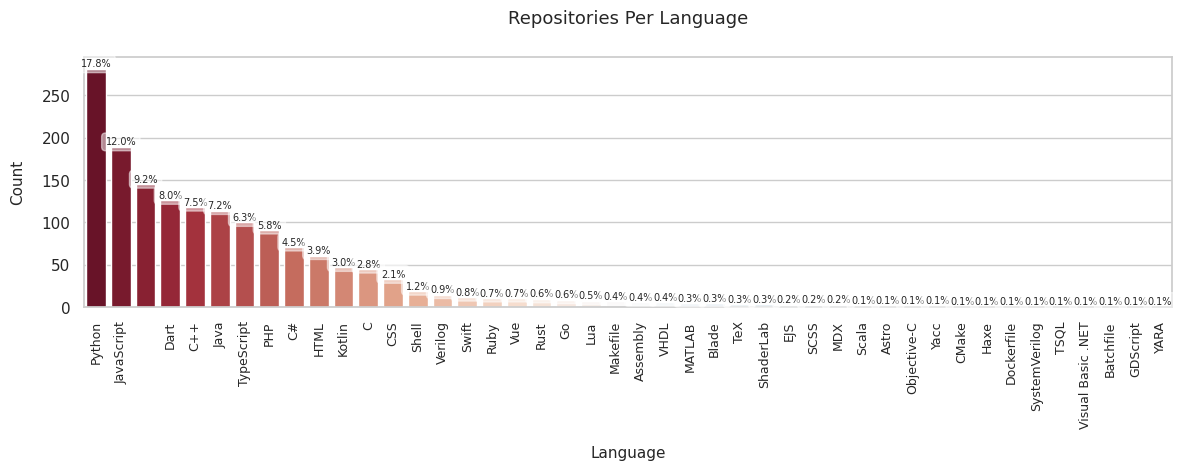

In [340]:
# Create a bar chart for language distribution
utils.bar_plot(df=language_counts, fontsize=11)


#### **Key Observations** 👀

1. **Prevalence of Python**
   - **Python** leads the pack with **281 projects**, making it the most popular language in the Egyptian open-source community. 
   - **Reson:** The popularity can be attributed to its versatility and ease of use, especially in fields like data science, machine learning, and web development.

2. **Strong Presence of JavaScript**
   - **JavaScript** ranks second with **189 projects**. 
   - **Reason:** As a crucial language for web development, its widespread use in front-end and back-end frameworks (e.g., Node.js) likely contributes to its popularity.

3. **Emergence of Dart**
   - **Dart** follows closely with **126 projects**.
   - Indicating a growing interest in Flutter for mobile app development. 
   - This reflects the community's engagement with modern mobile technologies.

4. **C++ and Java's Steady Engagement**
   - **C++** and **Java** have substantial counts of **118** and **114 projects**, respectively. 
   - These languages remain relevant in various domains, including **system programming** and **enterprise-level** applications.

5. **TypeScript's Growing Popularity**
   - **TypeScript** shows a solid count of **100 projects**.
   - This highlighting a trend towards statically typed languages in web development.

6. **Diversity in Language Usage**
   - The variety of programming languages, from **PHP** (91 projects) to **Rust** (10 projects), demonstrates a diverse set of interests and applications within the community. 
   
7. **Low Representation for Emerging Languages**
   - Languages like **Rust**, **Go**, and **Lua** have relatively low project counts (10, 9, and 8, respectively), suggesting they are still gaining traction within the community. 
   - This could indicate a potential area for growth as developers explore these modern programming languages.

#### **Conclusions** 💡

- The Egyptian open-source community exhibits a strong preference for **Python** and **JavaScript**, indicating active engagement in web and data-centric projects.
- The interest in **Dart** reflects emerging trends in mobile app development, while **TypeScript** is gaining traction among developers prioritizing type safety.
- The diversity in programming language usage highlights the community's potential for innovation and collaboration, with various languages being utilized for different applications.


---
### Question 3: Most Popular and Active Projects

**What is the top 20 projects: Ranked by contributors, commits, stars, and forks?**

**Solution:** Apply multi-level sorting 

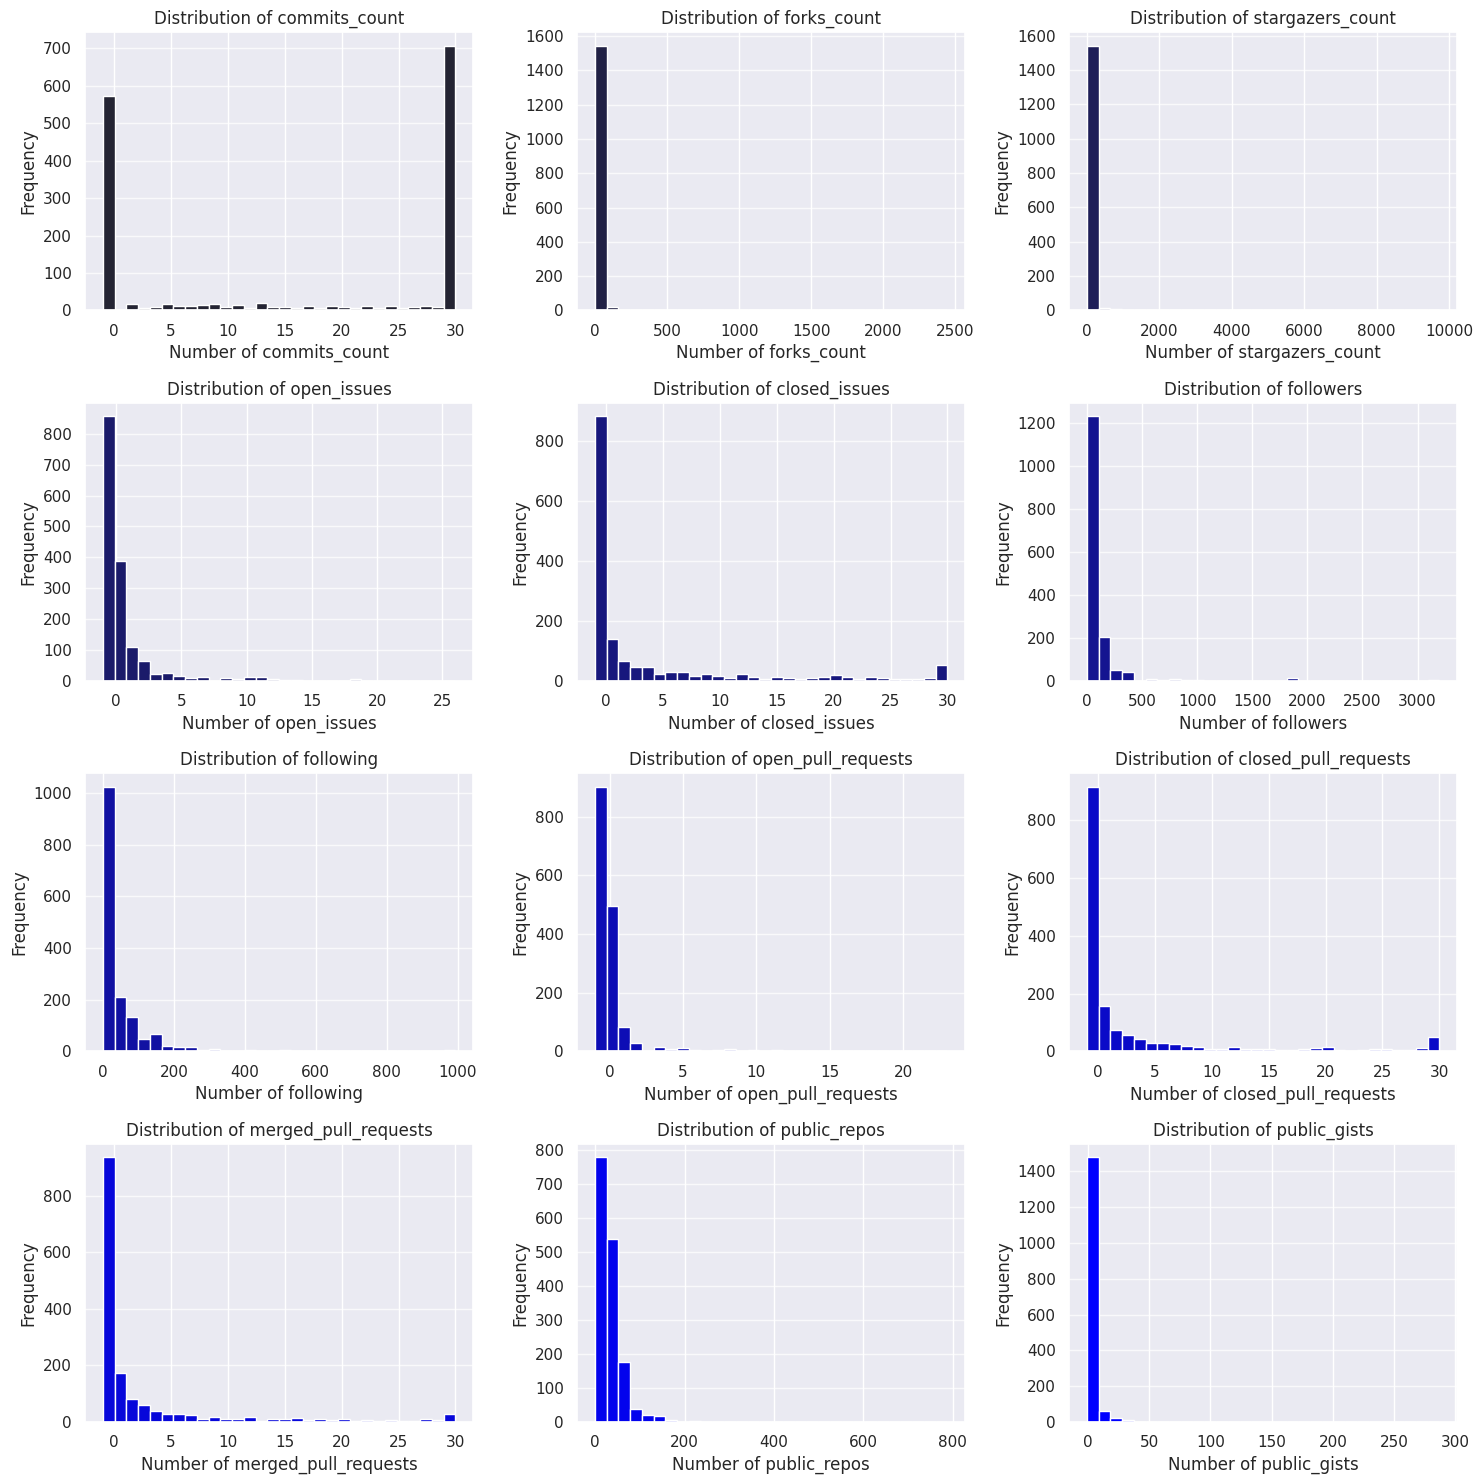

In [341]:
num_features = ['commits_count', 'forks_count', 'stargazers_count', 'open_issues', 
                'closed_issues','followers', 'following',  'open_pull_requests', 
                'closed_pull_requests', 'merged_pull_requests', 'public_repos', 'public_gists',]

utils.plot_histograms(data[num_features])

##### Apply Multi-level Sorting Technique

List of the top 20 Egyptian open source projects based on a a multi-level sorting approach to identify the top 20 Egyptian open source projects based on the following criteria:

1. **Stargazers Count (Descending)**
   - Projects with more stars are ranked higher, indicating greater popularity and interest.

2. **Forks Count (Descending)**
   - Within projects with similar star counts, projects with more forks are ranked higher, suggesting a wider adoption and usage. 

3. **Contributors Count (Descending)**
   - Within projects with similar star and fork counts, projects with more contributors are ranked higher, highlighting active community involvement.

4. **Commits Count (Descending)**
   - Finally, within projects with similar star, fork, and contributor counts, projects with more commits are ranked higher, suggesting ongoing development and maintenance.

**Output:**

- After the sorting, the `top_20_repos` DataFrame contains the top 20 projects ranked by this multi-level sorting approach.


In [342]:
sorted_by_cols = ['stargazers_count', 'forks_count', 'contribs_count', 'commits_count']
top_20_repos = data.sort_values(
    by=sorted_by_cols,
    ascending=[False, False, False, False]
).head(20)

print("Top 20 Egyptian Open Source Projects:")
top_20_repos[sorted_by_cols]

Top 20 Egyptian Open Source Projects:


,stargazers_count,forks_count,contribs_count,commits_count
467,9734,2104,21,-1
571,5151,2444,22,-1
372,3939,237,30,30
365,3372,113,27,30
574,2445,472,16,-1
650,2011,411,7,30
653,1662,291,6,30
652,1379,372,4,30
1322,1360,56,8,30
1296,1209,83,11,-1


In [343]:
melted_data = top_20_repos.head(10).melt(
    id_vars='repo_name',
    value_vars=['stargazers_count', 'forks_count', 'contribs_count'],
    var_name='Metric',
    value_name='Count'
)
melted_data

,repo_name,Metric,Count
0,Sublist3r,stargazers_count,9734
1,DeepLearning.ai-Summary,stargazers_count,5151
2,autoComplete.js,stargazers_count,3939
3,Shell,stargazers_count,3372
4,Competitive-programming-li...,stargazers_count,2445
5,Cr3dOv3r,stargazers_count,2011
6,One-Lin3r,stargazers_count,1662
7,Dr0p1t-Framework,stargazers_count,1379
8,WinPaletter,stargazers_count,1360
9,MyBrain,stargazers_count,1209


/root/miniconda3/envs/egy_opensource/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead

/root/miniconda3/envs/egy_opensource/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead

/root/miniconda3/envs/egy_opensource/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead

/root/miniconda3/envs/egy_opensource/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead



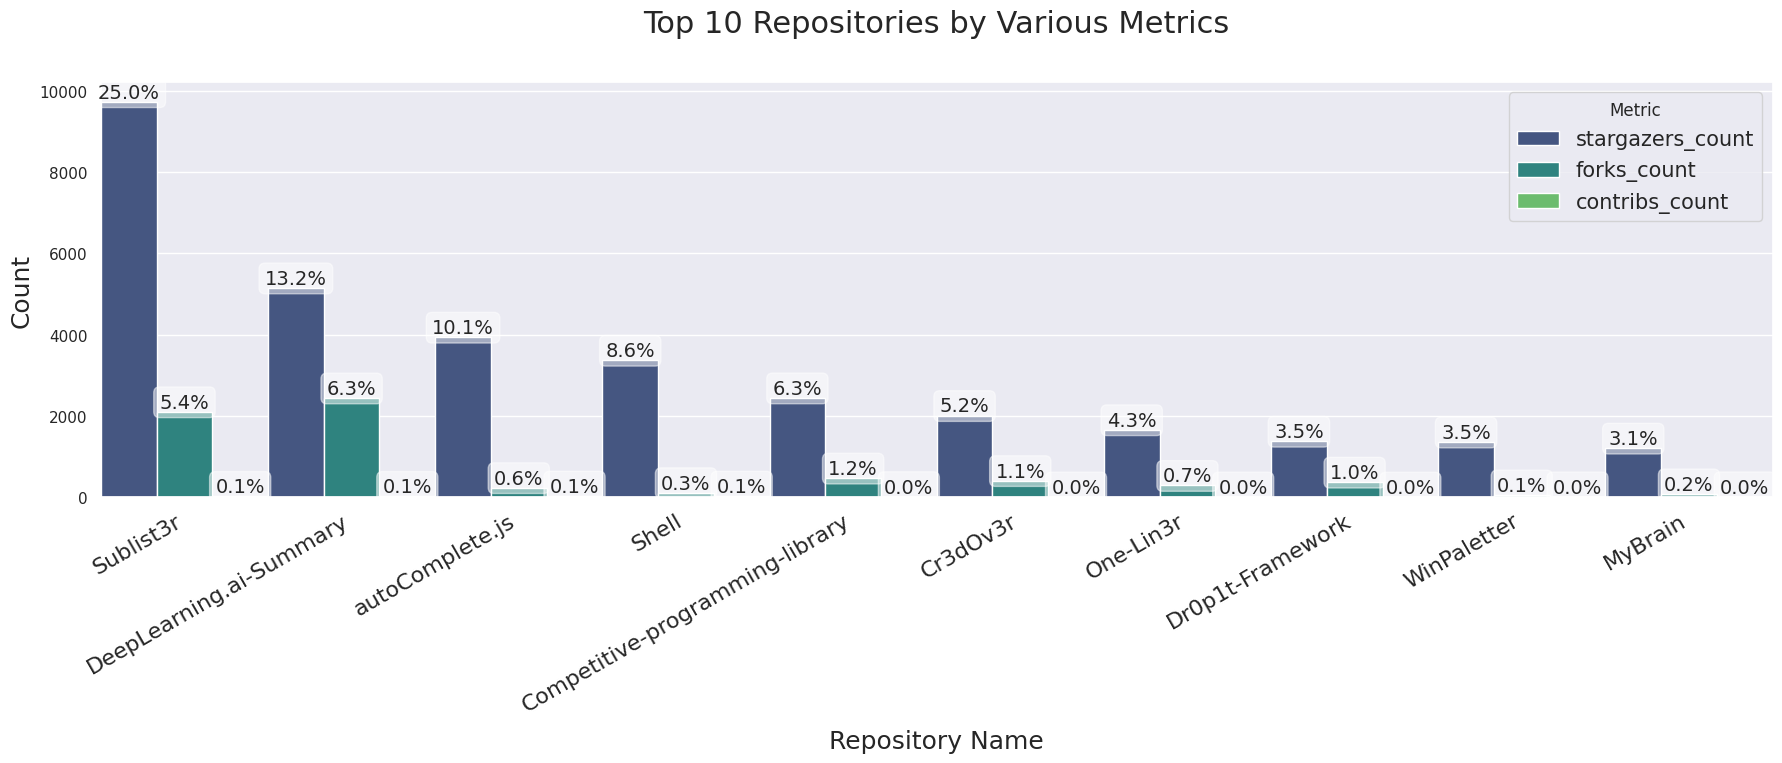

In [344]:
plt.figure(figsize=(18, 8))
palette_color = sns.color_palette('viridis', melted_data['Metric'].nunique())

# Create the bar plot
bar_plot = sns.barplot(x='repo_name', y='Count', hue='Metric',
                       width=1, data=melted_data, palette=palette_color)

plt.xticks(fontsize=16, rotation=30, ha="right")
plt.title('Top 10 Repositories by Various Metrics', y=1.1, fontsize=22)
plt.xlabel('Repository Name', fontsize=18, labelpad=10)
plt.ylabel('Count', fontsize=18)

# Total count for percentage calculation
total_count = melted_data['Count'].sum()

# Add percentage labels on top of the bars with background
for p in bar_plot.patches:
    percentage = f'{(p.get_height() / total_count) * 100:.1f}%'
    bar_plot.annotate(percentage,
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='bottom', fontsize=14,
                      bbox=dict(facecolor='white', alpha=0.5, boxstyle='round,pad=0.3'))  # Added bbox

plt.legend(title="Metric", fontsize=15)
plt.tight_layout()
plt.show()

#### **Key Observations** 👀

1. **High Popularity of Utility and Security Tools**
   - The top projects, such as **Sublist3r** (9734 stars) and **autoComplete.js** (3939 stars), demonstrate strong community interest in tools for security and web development. 
   - **Sublist3r** is a well-known subdomain enumeration tool, which aligns with the growing focus on cybersecurity.
   - Similarly, **Shell** and **Cr3dOv3r**, which are tools designed to enhance user productivity, show significant community involvement.

2. **Machine Learning Gaining Traction**
   - **DeepLearning.ai-Summary** is one of the top-ranked projects with (5151 stars) and (2444 forks).
   - It is indicating that machine learning has a notable presence in Egypt's open-source community. 
   - It highlights interest in educational content and frameworks related to AI.

3. **Active Community Involvement in Web and Competitive Programming**
   - **Competitive-programming-library** by **AhmadElsagheer** ranks high with 472 forks, highlighting the significance of competitive programming within the Egyptian tech community. 
   - It suggests a strong educational or learning-driven motivation behind open-source contributions.

4. **Number of Contributors:** 
   - Projects like **autoComplete.js**, **Shell**, and **DeepLearning.ai-Summary** show a healthy number of contributors and commits, indicating that they are actively maintained and improved over time. 
   - Some projects, despite having high star and fork counts, have relatively fewer contributors (e.g., **MyBrain** and **WinPaletter**). It might suggest that while these projects are popular, they are primarily driven by individual efforts or smaller teams. 

5. **Number of Froks:**
   - Projects like **Sublist3r** and **DeepLearning.ai-Summary** are widely forked, with over 2000 forks each, showcasing serve as templates or foundational tools that many developers build upon.

#### **Conclusions**💡
   
   - The top 20 projects reflect a wide range of fields, including front-end tools (e.g., **autoComplete.js**), cybersecurity (e.g., **Cr3dOv3r**), machine learning (e.g., **DeepLearning.ai-Summary**), and utilities (e.g., **Shell**). This diversity highlights the broad skill set and interests within the Egyptian open-source community.
   - The list of projects spans various developers, indicating that Egypt's open-source ecosystem is not dominated by a single entity but involves diverse contributors, each contributing unique tools and solutions to the global community.
   - The analysis highlights several key projects that have gained traction within the Egyptian open-source community, particularly in web development and machine learning.




---
### Question 4: Non-Egyptian Projects with Egyptian Contributors

**Which Non-Egyptian project (think Kubernetes or Firefox) that has the most Egyptian developers contributing?**

**Solution:** I've scraped 2000 top non-Egyptian repositories and reviewed all the contributors. In the end, I stored the profile of each contributor whose location is listed as Egypt.

In [345]:
contributors_file_path = "./data/processed/egyption_contribs.csv"
egy_contributors = pd.read_csv(contributors_file_path)
egy_contributors.head()

,repo_owner,repo_name,login,name,location,email,bio,public_repos,public_gists,followers,following,created_at,updated_at
0,codecrafters-io,build-your-own-x,xmonader,xmonader,Egypt,xmonader@gmail.com,I chase monads in my free ...,749,45,246,69,2009-03-17T02:03:09Z,2024-09-29T13:10:35Z
1,freeCodeCamp,freeCodeCamp,Sboonny,Muhammed Mustafa,Egypt,MuhammedElruby@gmail.com,Enjoy coding and a good jo...,99,0,83,24,2021-07-31T17:45:23Z,2024-03-20T09:36:36Z
2,codecrafters-io,build-your-own-x,xmonader,xmonader,Egypt,xmonader@gmail.com,I chase monads in my free ...,749,45,246,69,2009-03-17T02:03:09Z,2024-09-29T13:10:35Z
3,Pythagora-io,gpt-pilot,kerollosy,Kerollos Emad,Egypt,NaN,NaN,14,0,4,1,2021-06-17T00:42:00Z,2024-09-15T22:01:00Z
4,facebookresearch,faiss,AbdelrahmanElmeniawy,Abdelrahman Ashraf Elmeniawy,Egypt,abdelrhman.elmeniawy@gmail...,Computer and Systems Engin...,14,2,11,1,2019-07-13T21:27:06Z,2024-10-09T11:52:51Z


In [346]:
egy_contributors['login'].value_counts()

login
xmonader                2
Sboonny                 1
kerollosy               1
AbdelrahmanElmeniawy    1
ahmadalfy               1
Mostafa-Samir           1
seiko2plus              1
hatemhosny              1
mmghv                   1
Name: count, dtype: int64

#### **Key Observations** 👀
- Egyptian developers are actively contributing to major non-Egyptian open-source projects like **freeCodeCamp** and **Facebook Research's FAISS**, reflecting strong global participation.
- Developers like **xmonader** are prominent, contributing to multiple projects.
- Contributions are concentrated in **educational projects** and foundational tools, such as **build-your-own-x** and **freeCodeCamp**.

#### **Conclusions**💡
- The contributions of Egyptian developers to prominent global projects highlight their growing impact and presence in the international tech landscape.
- Contributions span a variety of fields, from machine learning to developer frameworks, indicating broad technical skills within the Egyptian developer community.




---
### Question 5: Top Industries/Topics

**What are the top 20 industries or topics that Egyptians build open source projects for?**

**Solution:** Create Clean Text For Topic Modelling through the following steps:

1. Merge the description, topics and language into a single text string
2. Removing stop words to clean the data. 
3. Generates a word cloud visualization of the most common topics
4. Create BERTopic model using the cleaned text and make comperhansive anlysis.
    

#### Merge Textual Data

In [347]:
# Iterate through the data and merge the text fields
for idx, repo in tqdm(data.iterrows(), colour='cyan',
                      total=len(data), desc='Create merged text'):

    # Merge 'repo_description' and 'topics' into one text string
    if isinstance(repo['language'], str):
        language = [repo['language'].lower()]
    else:
        language = []

    text_list = repo['repo_description'].lower().split(
    ) + repo['topics'].lower().split(",") + language

    merged_text = ' '.join(text_list)

    # Assign the merged text back to the 'text' column
    data.loc[idx, 'text'] = merged_text

Create merged text: 100%|██████████| 1579/1579 [00:00<00:00, 2788.00it/s]


#### Cleaning and Create WordCloud

In [348]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download stop words if not already downloaded
nltk.download('punkt')
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [349]:
import re
all_topics = []


def remove_stop_words(text):

    text = re.sub(r'[^A-Za-z0-9\s]', '', text)
    word_tokens = text.split(" ")
    filtered_text = [word for word in word_tokens if word.lower()
                     not in stop_words]

    if len(filtered_text) > 0:
        all_topics.extend(filtered_text)

    return ' '.join(filtered_text)


data['cleaned_text'] = data['text'].apply(remove_stop_words)

In [350]:
from collections import Counter

topic_counts = Counter(all_topics)
top_20_topics = topic_counts.most_common(20)
top_20_topics

[('', 6040),
 ('python', 392),
 ('c', 280),
 ('javascript', 270),
 ('using', 196),
 ('java', 183),
 ('project', 165),
 ('dart', 165),
 ('typescript', 136),
 ('php', 130),
 ('app', 116),
 ('system', 108),
 ('application', 100),
 ('flutter', 100),
 ('html', 97),
 ('android', 94),
 ('web', 77),
 ('api', 76),
 ('data', 71),
 ('simple', 71)]

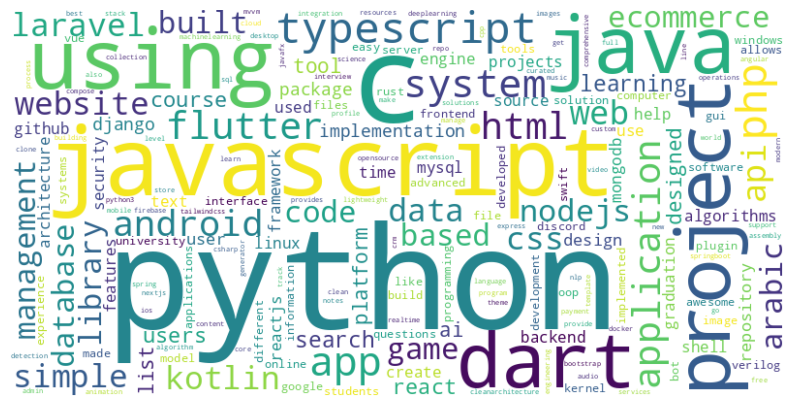

<Figure size 640x480 with 0 Axes>

In [351]:
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=400,
                      background_color="white").generate_from_frequencies(topic_counts)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

plt.savefig("./results/WordCloud.png", bbox_inches='tight')

> **Observation** 👀: Use **Topic Modelling** to discover hidden topics within your Egyptian open source projects. 


#### Create Topic Modeling using BERTopic

In [261]:
docs = data['cleaned_text']

In [262]:
from bertopic import BERTopic

topic_model = BERTopic(language="english", verbose=True)
topics, probabilities = topic_model.fit_transform(docs)

2024-10-15 14:54:26,919 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/50 [00:00<?, ?it/s]

2024-10-15 14:55:02,292 - BERTopic - Embedding - Completed ✓
2024-10-15 14:55:02,295 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-10-15 14:55:10,188 - BERTopic - Dimensionality - Completed ✓
2024-10-15 14:55:10,193 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-10-15 14:55:10,298 - BERTopic - Cluster - Completed ✓
2024-10-15 14:55:10,311 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-10-15 14:55:10,427 - BERTopic - Representation - Completed ✓


In [263]:
# Add topics to the DataFrame
data['topic_number'] = topics

In [264]:
topic_info = topic_model.get_topic_info()
topic_info.to_csv("./data/raw/topic_info.csv", index=False)

In [265]:
topic_model.visualize_topics()

In [266]:
# Visualize the topic distribution
topic_model.visualize_distribution(probabilities).show()

#### Analyze Topics over Time

Analyze how specific topics within the dataset evolve throughout different time periods. By associating topics with their corresponding timestamps, it provides valuable insights into trends and shifts in focus within the data, facilitating a better understanding of the underlying patterns over time.

In [267]:
# Create a list of timestamps corresponding to the topics
timestamps = data['last_repo_commit_date']
print(len(timestamps))
# Generate topics over time
topics_over_time = topic_model.topics_over_time(data['cleaned_text'], timestamps)

2024-10-15 14:55:11,906 - BERTopic - WARNING: There are more than 100 unique timestamps (i.e., 1563) which significantly slows down the application. Consider setting `nr_bins` to a value lower than 100 to speed up calculation. 


1579


1563it [00:23, 67.07it/s]


In [268]:
topic_model.visualize_topics_over_time(topics_over_time)

#### Classify the Represenation Keywords into Domain

I created a dictionary categorizes the keywords into project domains (with the aid of chatgpt). As shown in the below example.
- I've saved this mapping to `./data/json_file/domain_categories.json`.

```json
{
    "Mobile Development": [
        "android",
        "ios",
        "kotlin",
        "flutter"
    ],
    "Data Science & AI": [
        "ai",
        "deeplearning",
        "data",
        "nlp"
    ]
}


In [269]:
import json

with open("./data/json_files/domain_categories.json", "r") as file:
    domain_categories = json.load(file)

In [270]:
def get_domain(representation):
    """Maps a topic representation to its corresponding domain(s)."""
    if representation is None:
        return []

    all_domains = ""
    for domain, keywords_list in domain_categories.items():

        if any(keyword in representation for keyword in keywords_list):
            all_domains = " & ".join([domain, all_domains])

    return all_domains


topic_info["Domain"] = topic_info['Representation'].apply(get_domain)
topic_info["Domain"] = topic_info["Domain"].str.rstrip('& ')

In [271]:
domains_df = data.merge(
    topic_info[['Topic', 'Domain']], left_on='topic_number', right_on='Topic')
domains_df.rename(columns={"Domain": "repo_domains"}, inplace=True)

In [272]:
pd.set_option('display.max_colwidth', 30)
domains_df.sample(2)

,owner,repo_name,repo_html_url,topics,forks_count,repo_description,stargazers_count,last_repo_commit_date,license,contribs_count,...,commit_year,commit_month,commit_month_name,city,region,text,cleaned_text,topic_number,Topic,repo_domains
635,EightyVice,GTASDKNET,https://github.com/EightyV...,,1,A .NET SDK for creating pl...,15,2024-04-28 06:49:21+00:00,MIT License,2,...,2024,4,April,Asyut,Upper Egypt,a .net sdk for creating pl...,net sdk creating plugins m...,-1,-1,Database & Data Science & ...
906,Bit-Camp-IO,E-Fashion_BackEnd,https://github.com/Bit-Cam...,"api, e-commerce, email, ex...",0,Fashion store,8,2024-09-10 04:39:41+00:00,Apache License 2.0,3,...,2024,9,September,Egypt,Egypt,fashion store api e-comme...,fashion store api ecommer...,4,4,Database & Web Development


In [273]:
# Group repositories by domains and count occurrences
pd.set_option('display.max_colwidth', 80)
domains_count = pd.DataFrame(domains_df['repo_domains'].value_counts()).reset_index()
domains_count

,repo_domains,count
0,Database & Data Science & AI & Web Development,273
1,Educational & Data Science & AI,236
2,Web Development,121
3,Networking & Web Development,99
4,Data Science & AI,94
5,Database & Mobile Development,86
6,Mobile Development,86
7,Management System,74
8,Data Science & AI & Web Development,57
9,Security & Data Science & AI,54


#### Analyzing Cities and Regions Through Topic Modeling with BERTopic

Use the BERTopic model to identify and visualize the distribution of topics within different cities and regions.

In [275]:
region_classes = data["region"].tolist()

topics_per_city = topic_model.topics_per_class(docs, classes=region_classes)

topic_model.visualize_topics_per_class(topics_per_city)

7it [00:00,  8.34it/s]


In [276]:
# Handle noise ina an instance
data.loc[838, 'city'] = 'Egypt'

In [277]:
city_classes = data["city"].tolist()

topics_per_city = topic_model.topics_per_class(docs, classes=city_classes)
topic_model.visualize_topics_per_class(topics_per_city)

25it [00:00, 68.92it/s]


In [735]:
# # Reduce the number of topics
# # Set nr_topics to the desired number of topics
# topic_model.reduce_topics(all_topics, nr_topics=20)

# top_20_topics = topic_model.get_topic_info()
# top_20_topics

#### Analyzing Programming Languages Through Topic Modeling with BERTopic

Use the BERTopic model to identify and visualize the distribution of topics within different programming languages.

In [278]:
# Filter the DataFrame to exclude rows with NaN in the "language" column
tmp = data[~data["language"].isna()]

# Prepare the list of language classes and all topics
language_classes = tmp["language"].tolist()
all_topics = tmp['cleaned_text'].tolist()

In [279]:
# Create and fit your topic model
topic_model2 = BERTopic(language="english", verbose=True)
topic_model2.fit(all_topics)

2024-10-15 14:56:46,797 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/50 [00:00<?, ?it/s]

2024-10-15 14:57:36,277 - BERTopic - Embedding - Completed ✓
2024-10-15 14:57:36,279 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-10-15 14:57:52,077 - BERTopic - Dimensionality - Completed ✓
2024-10-15 14:57:52,084 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-10-15 14:57:52,205 - BERTopic - Cluster - Completed ✓
2024-10-15 14:57:52,214 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-10-15 14:57:52,318 - BERTopic - Representation - Completed ✓


In [280]:
topics_per_lang = topic_model2.topics_per_class(docs, classes=language_classes)
topic_model2.visualize_topics_per_class(topics_per_lang)

44it [00:00, 52.95it/s]


#### **Key Observations** 👀

1. **Dominance of Educational Projects**: The **Educational & Data Science & AI** domain leads with 290 projects, indicating a strong emphasis on educational technology and data literacy among developers.
  
2. **Data Science Growth**: With 103 projects specifically in **Data Science & AI**, there is a growing focus on data-driven technologies, showing significant interest in this field.

3. **Mobile Development Demand**: The presence of 90 projects in **Mobile Development** reflects an active pursuit of mobile solutions, catering to increasing market needs.

4. **Management and Security Systems**: The notable count of **Management Systems** (81 projects) and **Security & Data Science & AI** (56 projects) suggests a focus on operational efficiency and cybersecurity.

5. **Emerging Niche Areas**: Domains like **Tools & Utilities** and **Robotics**, while having fewer projects (13-37), highlight niche interests that could expand with technological advancements.

#### **Conclusion** 💡

1. **Educational Initiatives Flourishing**: The high number of educational projects indicates effective training programs fostering open-source engagement.

2. **Interdisciplinary Trends**: The overlap among **Web**, **Mobile**, and **Data Science** illustrates a trend of combining skills for innovative solutions.

3. **Market Opportunities**: The focus on **Management Systems** and **Security** points to potential business opportunities in developing tools for organizational needs.

4. **Support for Niche Development**: Less populated areas like **Robotics** signify potential for specialized development that could grow with interest.

5. **Community Collaboration**: The active ecosystem among Egyptian developers suggests a need for initiatives to enhance collaboration and knowledge sharing.

6. **Global Contribution Potential**: The significant number of educational and data-focused projects positions Egyptian developers to make valuable contributions to global open-source efforts.


----
### Question 6: Top Frameworks and Libraries

**What are the Top Frameworks and top libraries used in Egyptian open source projects?**

**Solution:** 

The goal is to identify the most frequently used frameworks and libraries within the projects, which provides insights into the technology landscape of the community.

1. **Data Extraction:**
   - The code first extracts the list of dependencies from the `data['dependencies']` column. This data was likely fetched from the GitHub dependency graph API, which provides information on the packages and libraries a project relies on.

2. **Data Cleaning:**
     - It removes leading and trailing whitespace using `dep.strip()`.
     - It removes specific characters ("@", "'", "[" and "]") using a regular expression `re.sub(r'[@\'\[\]]', '', dep)`.

3. **Dependency Extraction:**
   - The code then splits each dependency by "." and "/" and extracts the first part (the library or framework name). This assumes that dependencies follow a common format where the last part of the string represents the library or framework.

In [352]:
import json

# Load the JSON data
with open("./data/json_files/all_dependencies.json", "r", encoding='utf-8') as file:
    dependencies = json.load(file)

# Extract all dependencies into a single list
all_dependencies = []

# Loop through each repository and append dependencies if they exist
for item in dependencies:
    if len(item['dependencies']) > 0:
        # Use 'extend' to flatten the list
        all_dependencies.extend(item['dependencies'])

print(f"Total number of dependencies: {len(all_dependencies)}")

Total number of dependencies: 245129


In [353]:
cleaned_dependencies = []
for dep in all_dependencies:
    # Clean the dependency
    cleaned_dep = re.sub(r'[@\'\[\]]', '', dep.strip())

    if cleaned_dep:  # Check if not empty after cleaning
        # Extract the first part before '.' and '/'
        cleaned_dependencies.append(cleaned_dep.split(".")[0].split("/")[0])

# Display the first 10 cleaned dependencies
print(cleaned_dependencies[:5])

['json-loader', 'sinon', 'extract-text-webpack-plugin', 'url-loader', 'babel-eslint']


In [354]:
dependency_count = Counter(cleaned_dependencies)
# Create an empty DataFrame
deps_df = pd.DataFrame(columns=['dependency', 'count'])

for idx, (dep, count) in enumerate(dependency_count.items()):
    deps_df.loc[idx, 'dependency'] = dep
    deps_df.loc[idx, 'count'] = count

In [355]:
deps_df = deps_df.sort_values(
    by='count', ascending=False).reset_index(drop=True)

In [356]:
top_20_dependencies = deps_df.head(20)
top_20_dependencies

,dependency,count
0,babel,16777
1,types,6488
2,webassemblyjs,1962
3,esbuild,1807
4,lodash,1645
5,jest,1345
6,typescript-eslint,1072
7,jridgewell,1013
8,symfony,927
9,svgr,836


/root/miniconda3/envs/egy_opensource/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead

/root/miniconda3/envs/egy_opensource/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead

/root/miniconda3/envs/egy_opensource/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead



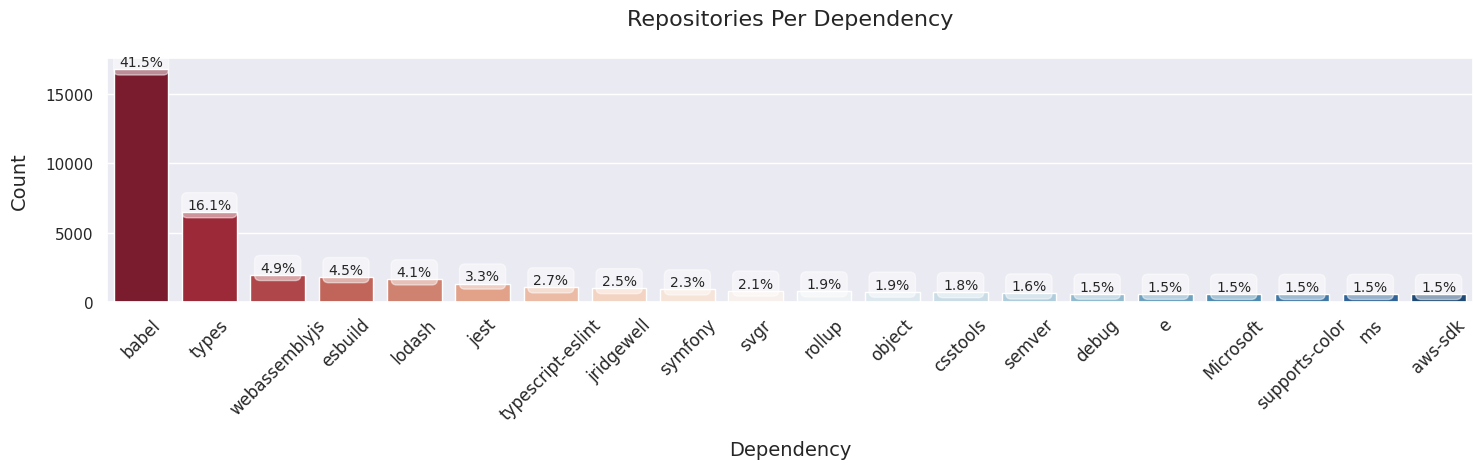

In [357]:
utils.bar_plot(df=top_20_dependencies, figsize=(15, 5), rotation=45)

#### **Key Observations** 👀

**JavaScript Dominance:**
* **`babel` (16,777)** is the clear leader, demonstrating the strong emphasis on JavaScript development for browser compatibility.
* **`types` (6,488)** indicates the increasing reliance on TypeScript and type definitions, promoting code reliability.
* The **`webassemblyjs` (1,962)** library underscores the growing importance of WebAssembly for enhancing web performance and enabling cross-platform support.
* **`esbuild` (1,807)**, a JavaScript bundler and minifier, highlights the community's focus on efficient build processes.

**Front-End Frameworks:**
* **`lodash` (1,645)** remains a popular utility library, reflecting the need for reusable and efficient code.
* **`jest` (1,345)** signifies a strong commitment to testing practices in the community, ensuring robust application development.
* The use of **`typescript-eslint` (1,072)** emphasizes adherence to best coding practices and code quality in TypeScript projects.

**Emerging Libraries:**
* **`jridgewell` (1,013)** and **`symfony` (927)** showcase the integration of modern tooling and frameworks, enhancing development efficiency.
* **`svgr` (836)** highlights the growing trend of converting SVGs into React components for streamlined UI development.
* **`rollup` (784)** indicates a focus on module bundling and optimizing JavaScript applications.

**Backend and Utility Tools:**
* **`aws-sdk` (592)** reflects the integration of cloud services into projects, signifying a shift towards cloud-native applications.
* Other dependencies like **`debug` (617)**, **`csstools` (726)**, and **`semver` (633)** reveal the emphasis on debugging, CSS management, and semantic versioning, respectively.

#### **Conclusion:** 💡

The updated analysis of the top dependencies illustrates a thriving Egyptian open-source community with a robust focus on JavaScript and TypeScript development. The emphasis on testing, performance optimization, and cloud integration highlights a commitment to modern development practices and tools, contributing to a vibrant ecosystem.

---
### Question 7: Top Databases

**What are the Top Databases used by these projects?**



In [437]:
with open("./data/json_files/database_keywords.json", "r") as file:
    database_json = json.load(file)

database_keywords = database_json.keys()
print(database_keywords)

dict_keys(['PostgreSQL', 'MySQL', 'MariaDB', 'MongoDB', 'SQLite', 'Redis', 'Cassandra', 'DynamoDB', 'AWS DynamoDB', 'Elasticsearch', 'Neo4j', 'Couchbase', 'Firebase', 'Oracle', 'SQL Server', 'MS SQL', 'MS Access', 'DB2', 'Teradata', 'Greenplum', 'Sybase', 'Informix'])


In [451]:
# the dictionary of counts (db_values is populated from your iteration logic)
db_values = {key: 0 for key in database_keywords}

# Iterate through each list in the column and check for occurrences of the keys
for db_list in data['database_types']:
    for db in db_list:
        if db in db_values:
            db_values[db] += 1

# Convert the dictionary into a DataFrame and transpose it
db_values = pd.DataFrame.from_dict(db_values, orient='index', columns=['Count'])

# Reset index to make database names a column
db_values = db_values.reset_index().rename(columns={'index': 'Database'}) 
db_values = db_values[db_values['Count'] > 0].sort_values(by="Count", ascending=False)
db_values

,Database,Count
7,DynamoDB,17
12,Firebase,16
3,MongoDB,9
5,Redis,4
0,PostgreSQL,3
4,SQLite,3
1,MySQL,2
13,Oracle,2
17,DB2,1


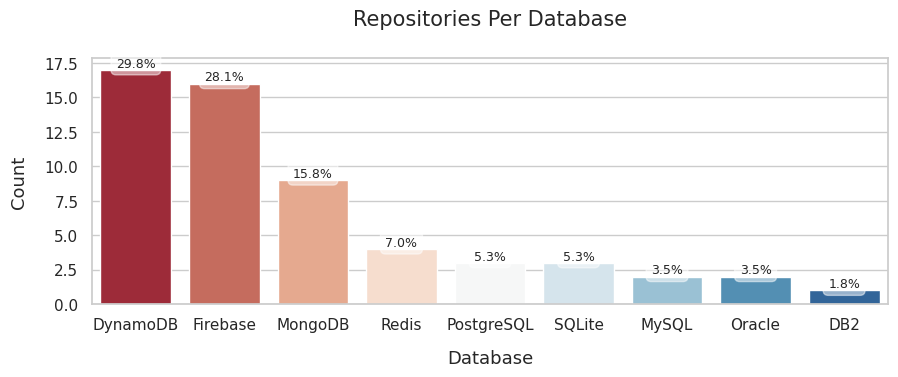

In [462]:
utils.bar_plot(db_values, figsize=(9,4), fontsize=13, rotation=0)

#### **Key Observation** 👀


- **DynamoDB** is the most used database in Egyptian open-source GitHub projects, appearing 17 times.
- **Firebase** follows closely with 16 occurrences, making it the second most popular database.
- **MongoDB** comes in third with 9 occurrences, showing a strong preference for NoSQL databases.
- **Redis** appears 4 times, suggesting moderate use of in-memory databases.
- **PostgreSQL** and **SQLite** each show up 3 times, indicating some usage of traditional relational databases.
- **MySQL** and **Oracle** are used less frequently, each with only 2 occurrences.
- **DB2** appears just once, showing minimal adoption.

#### **Conclusion**💡

- **NoSQL Databases Lead**: The top three databases (DynamoDB, Firebase, and MongoDB) are all NoSQL, suggesting that Egyptian open-source projects on GitHub prefer flexible and scalable databases.
- **Cloud-Based Databases are Popular**: DynamoDB and Firebase, both cloud-native, are widely used (33 occurrences combined), highlighting a strong trend towards cloud solutions in these projects.
- **Lower Usage of Traditional Relational Databases**: Despite being common globally, traditional databases like PostgreSQL and MySQL are less popular in these Egyptian open-source projects.

---
### Question 8: Project Documentation Quality

**How many projects are well-documented?**

1. **Checking for Basic Stuff:**
   - Looking at each repo and see if there are any files at all. If it's completely empty, we give it a zero score --> not documented!
   - Looking for a special folder called "docs". If it's there, we give it extra points because it suggests the repo is really dedicated to documentation.
   - Checking for common files like `README.md` or `README.rst` --> repo has the basic intro to a project, so repo get some points too.

2. **Analyzing the README:**
   - If a `README` file is found, we look inside it! 
   - Checking for sections talking about "contributing" (for how people can help the project), "description" (telling what the project is about), and instructions on how to "install", "run", or "start" the project. 
   - If those sections are found, we give the repo more points.

3. **Looking for Setup Files:**
   - Searching for specific files that indicate how to set up the project, like:
     - `setup.py`  (used for Python projects)
     - `requirements.txt` (listing dependencies)
     - `package.json` (for JavaScript projects)
     - `environment.yml`  (used with tools like conda)
     - `Pipfile`  (used with pipenv)
     - `setup.cfg`  (for configuration)
   - Finding any of these means that the repo has good instructions on how to get started, so give it extra points.

4. **Finding API Documentation:**
   - Searching for any links or files that suggest there's API documentation (like files ending in `.json` or pages talking about "Swagger" or "OpenAPI").
   - If API documentation is found, the repo is given even more points because it's really important for well-documented projects.

5. **Adding Up the Scores:**
   - Adding all the points for each repo based on what Ifound.  
   - The higher the score, the better documented the repo is.

#### Top 20 Well-documented Repository

In [ ]:
scores = []
for index, row in tqdm(repos_df.iterrows(), total=len(repos_df),
                       desc="Documentation Scoring"):
    assessor = GitHubDocAssessor(row)
    repos_df.loc[index, 'documentation_score'] = assessor.assess_documentation()

In [ ]:
well_documented_repos = data.sort_values(
    by='documentation_score', ascending=False)
top_20_well_documented_repos = well_documented_repos[[
    'repo_name', 'name', 'documentation_score', 'repo_html_url']].head(20)
print(top_20_well_documented_repos.to_string())

                         repo_name                     name  documentation_score                                             repo_html_url
25                          aktive           Kerollos Magdy                    6                        https://github.com/kerolloz/aktive
107               dorar-hadith-api            أحمد الطبراني                    6       https://github.com/AhmedElTabarani/dorar-hadith-api
198                  DevCampersAPI           Mahmoud Yasser                    6              https://github.com/Braineanear/DevCampersAPI
137                     El-Messiri            Mohamed Gaber                    5                    https://github.com/Gue3bara/El-Messiri
136                          Cairo            Mohamed Gaber                    5                         https://github.com/Gue3bara/Cairo
438                         JQuran              Loay Ghreeb                    5                      https://github.com/LoayGhreeb/JQuran
354                       S

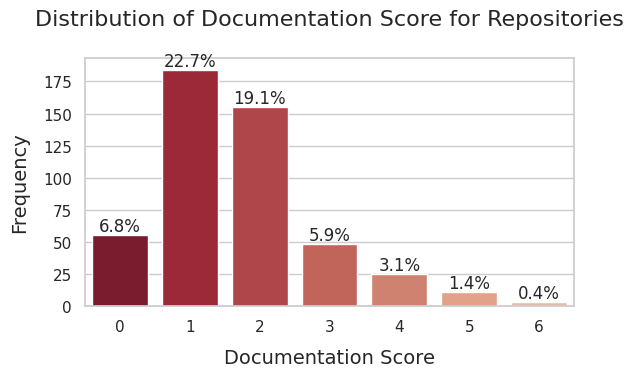

In [ ]:
plt.figure(figsize=(6, 4))
palette_color = sns.color_palette('RdBu', 20)

bar_plot = sns.countplot(data=well_documented_repos,
                         x='documentation_score', palette=palette_color)
plt.title("Distribution of Documentation Score for Repositories",
          fontsize=16, y=1.1)
plt.ylabel('Frequency', fontsize=14, labelpad=10)
plt.xlabel('Documentation Score', fontsize=14, labelpad=10)
plt.tight_layout()

# Add percentage labels on top of the bars
total = well_documented_repos['documentation_score'].sum()

for p in bar_plot.patches:
    percentage = f'{(p.get_height() / total) * 100:.1f}%'
    bar_plot.annotate(percentage,
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='bottom', fontsize=12)

plt.show()

---
### Question 9: Pull Request Activity

**How many pull requests are open versus merged in the projects?**

**SolutionL**
* Aggregate view of the total number of *open*, *closed*, and *merged* pull requests by summing the respective columns and presented in a concise table.
* Using histogram, plot the distribution of each pull request type.

In [745]:
# Calculate the sum of open, closed, and merged pull requests, and create a DataFrame to summarize the data.
pr_columns = ['open_pull_requests', 'closed_pull_requests', 'merged_pull_requests']
pr_types = ['Open PR', 'Closed PR', 'Merged PR']

pull_requests_data = pd.DataFrame({
    'Pull Request Type': pr_types,
    'Total': [data[col].sum() for col in pr_columns] 
})

pull_requests_data

,Pull Request Type,Total
0,Open PR,1227
1,Closed PR,8916
2,Merged PR,7321


In [746]:
palette_color=['#dc3545', '#2E4053', '#28B463']

utils.bar_plot(pull_requests_data, fontsize=14, figsize=(5.5, 4), palette_color=palette_color, rotation=0)

TypeError: bar_plot() got an unexpected keyword argument 'palette_color'

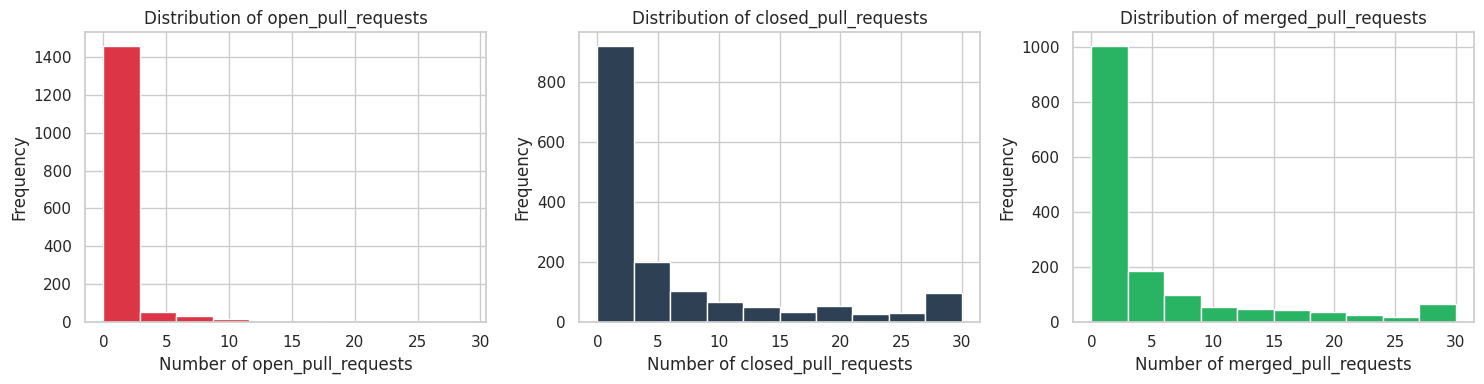

In [585]:
utils.plot_histograms(data, columns=pr_columns, palette_color = palette_color)

#### **Key Observation** 👀

1. **Total Counts of Pull Request Types**:
   - **Open Pull Requests**: **1,227** 🟥
   - **Closed Pull Requests**: **8,916** ⬛
   - **Merged Pull Requests**: **7,321** 🟩

   The high number of closed and merged pull requests suggests a strong activity in resolving and managing PRs efficiently. 

2. **Distribution Analysis**:
   - **Open Pull Requests**: The histogram indicates a significant concentration at low values, primarily around **0**. This suggests a backlog that needs attention. ⚠️
   - **Closed Pull Requests**: A peak at **0-5** shows that many pull requests are being closed quickly, reflecting an efficient review process. ✅
   - **Merged Pull Requests**: Similar to closed pull requests, most merges occur within the **0-5** range, indicating a focused effort on fewer contributions. 🔄

#### **Concluion**💡
   - A healthy ratio of merging to closing pull requests signifies effective code quality management. 
   - The higher count of closed pull requests compared to merged ones may indicate that many submissions require improvement before being accepted. 
   - The relatively low open pull requests show good workflow management, ensuring prompt issue resolution. 

---
### Question 10: Issue Tracking Activity

**What is the distribution of open versus closed issues across projects?**


**Solution:**
* Aggregate view of the total number of *open*, *closed*, and *merged* issus by summing the respective columns and presented in a concise table.
* Using histogram, plot the distribution of each issus type.

In [623]:
# Calculate the sum of open, closed, and merged pull requests, and create a DataFrame to summarize the data.
issues_columns = ['open_issues', 'closed_issues']
issues_types = ['Open Issues', 'Closed Issues']

issues_data = pd.DataFrame({
    'Issue Type': issues_types,
    'Total': [data[col].sum() for col in issues_columns] 
})

issues_data

,Issue Type,Total
0,Open Issues,2608
1,Closed Issues,10589


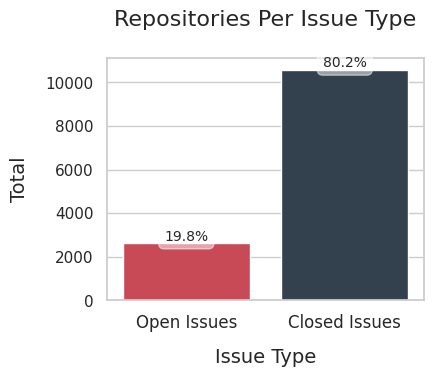

In [629]:
palette_color=['#dc3545', '#2E4053']

utils.bar_plot(issues_data, fontsize=14, figsize=(4.5,4), palette_color=palette_color, rotation=0)

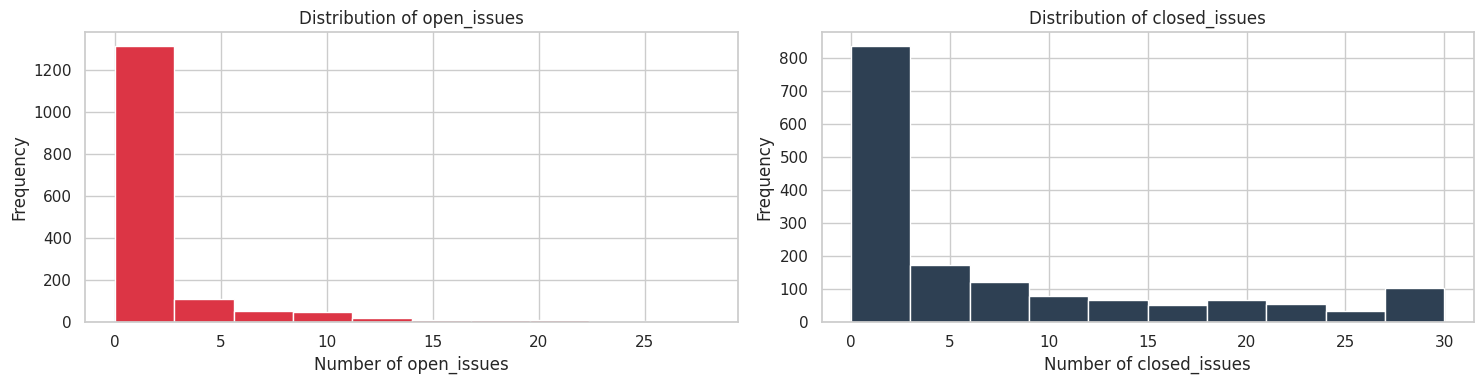

In [630]:
utils.plot_histograms(data, columns=issues_columns, palette_color = palette_color)

#### **Key Observation** 👀


1. **Total Counts of Issue Types**:
   - **Open Issues**: **2,608** 🟥
   - **Closed Issues**: **10,589** ⬛

2. **Distribution Insights**:
   - The **Open Issues** distribution indicates that a significant number of repositories have relatively few open issues, with the majority concentrated at lower counts. This suggests that while many issues are logged, they may not be extensive in number per repository.
   - The **Closed Issues** distribution also reflects a heavy concentration at lower values, but the total count is substantially higher than open issues, showing effective management and resolution of issues.


#### **Concluion**💡
   - The data illustrates a common scenario in software development where the number of closed issues vastly outnumbers open ones, indicating that teams are actively addressing problems. 
   - The substantial gap between open and closed issues may suggest a healthy workflow, where contributors are engaged in resolving issues promptly.


   

In [ ]:
data['open_issue'] = data['open_issue'].fillna(0).astype(int)
data['closed_issue'] = data['closed_issue'].fillna(0).astype(int)

issue_data = pd.DataFrame({
    'Issue Type': ['Open Issues', 'Closed Issues'],
    'Count': [data['open_issue'].sum(), data['closed_issue'].sum()]
})
issue_data

,Issue Type,Count
0,Open Issues,482
1,Closed Issues,1283


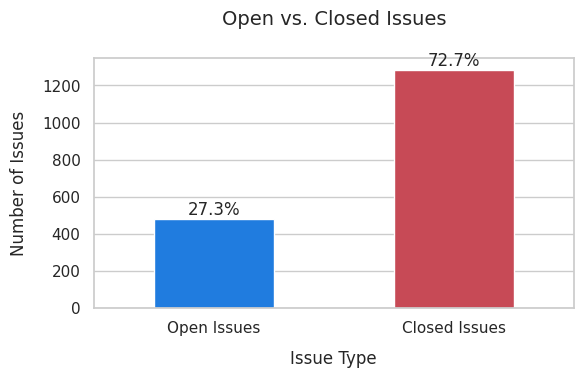

In [ ]:
plt.figure(figsize=(6, 4))

bar_plot = sns.barplot(x='Issue Type', y='Count', data=issue_data,
                       palette={'Open Issues': '#007bff', 'Closed Issues': '#dc3545'}, width=0.5)

plt.title("Open vs. Closed Issues", y=1.1, fontsize=14)
plt.xlabel("Issue Type", labelpad=10, fontsize=12)
plt.ylabel("Number of Issues", labelpad=10, fontsize=12)
plt.tight_layout()

# Add percentage labels on top of the bars
total = issue_data['Count'].sum()

for p in bar_plot.patches:
    percentage = f'{(p.get_height() / total) * 100:.1f}%'
    bar_plot.annotate(percentage,
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='bottom', fontsize=12)

plt.show()

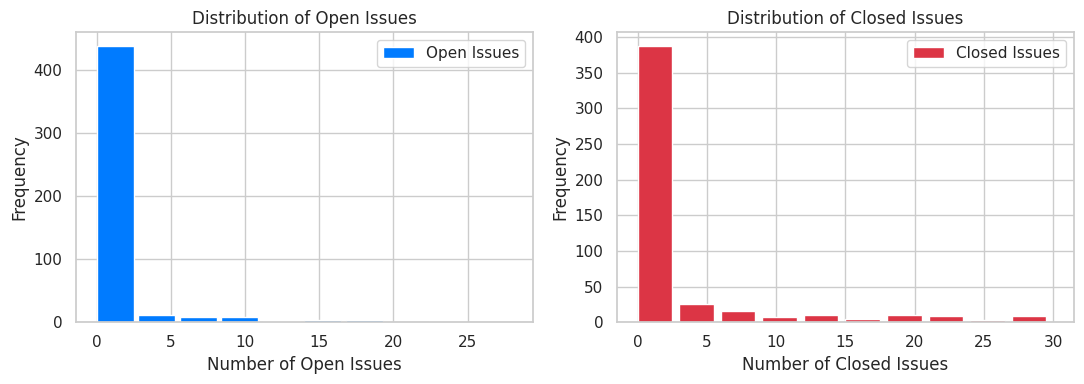

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(11, 4))

# Create the first histogram (Open Issues)
axes[0].hist(data['open_issue'], width=2.5,
             label='Open Issues', color="#007bff")

axes[0].set_title("Distribution of Open Issues")
axes[0].set_xlabel("Number of Open Issues")
axes[0].set_ylabel("Frequency")
axes[0].legend()

# Create the second histogram (Closed Issues)
axes[1].hist(data['closed_issue'], width=2.5,
             label='Closed Issues', color="#dc3545")

axes[1].set_title("Distribution of Closed Issues")
axes[1].set_xlabel("Number of Closed Issues")
axes[1].set_ylabel("Frequency")
axes[1].legend()

plt.tight_layout()
plt.show()

#### **Key Observation** 👀

* The project has significantly more closed issues than open issues. 
* This suggests the project is actively maintained and that issues are being resolved at a reasonable pace.
* The distributions are skewed towards the left, with a large number of projects having very few open and closed issues.

---
### Question 11: Top Licenses

**Top 10 licenses used in the projects (MIT, BSD, Apache, GPL, etc)**

* Analyze the frequency of different licenses used in the projects using the `license` field.


In [631]:
# Group repositories by license and count occurrences
license_counts = data['license'].value_counts()
license_counts

license
                                                              909
MIT License                                                   422
GNU General Public License v3.0                                78
Apache License 2.0                                             61
Other                                                          45
GNU General Public License v2.0                                14
GNU Affero General Public License v3.0                         13
SIL Open Font License 1.1                                       6
The Unlicense                                                   4
Creative Commons Attribution Share Alike 4.0 International      4
Creative Commons Attribution 4.0 International                  4
GNU Lesser General Public License v2.1                          4
GNU Lesser General Public License v3.0                          4
BSD 2-Clause "Simplified" License                               3
BSD 3-Clause "New" or "Revised" License                         2
Cr

In [635]:
# Define the licenses and their respective names
license_mappings = {
    'MIT': 'MIT License',
    'Apache': 'Apache License 2.0',
    'SIL Open Font': 'SIL Open Font License 1.1',
    'Mozilla Public': 'Mozilla Public License 2.0',
    'BSD 2-Clause': 'BSD 2-Clause "Simplified" License',
    'GNU General': [
        'GNU General Public License v3.0',
        'GNU General Public License v2.0',
        'GNU Affero General Public License v3.0',
        'GNU Lesser General Public License v3.0'
    ],
    'Creative Commons': [
        'Creative Commons Attribution 4.0 International',
        'Creative Commons Zero v1.0 Universal',
        'Creative Commons Attribution Share Alike 4.0 International'
    ],
    'Other': [
        'Other',
        'The Unlicense'
    ]
}

# Calculate the merged license counts using a dictionary comprehension
merged_license_counts = {
    name: sum(license_counts[license_name] for license_name in (licenses if isinstance(licenses, list) else [licenses]))
    for name, licenses in license_mappings.items()
}

# Create the DataFrame from the merged license counts
license_df = pd.DataFrame.from_dict(merged_license_counts, orient='index', columns=['Count']) \
                     .sort_values(by='Count', ascending=False).reset_index()

license_df.rename(columns={'index': 'License'}, inplace=True)
license_df

,License,Count
0,MIT,422
1,GNU General,109
2,Apache,61
3,Other,49
4,Creative Commons,10
5,SIL Open Font,6
6,BSD 2-Clause,3
7,Mozilla Public,2


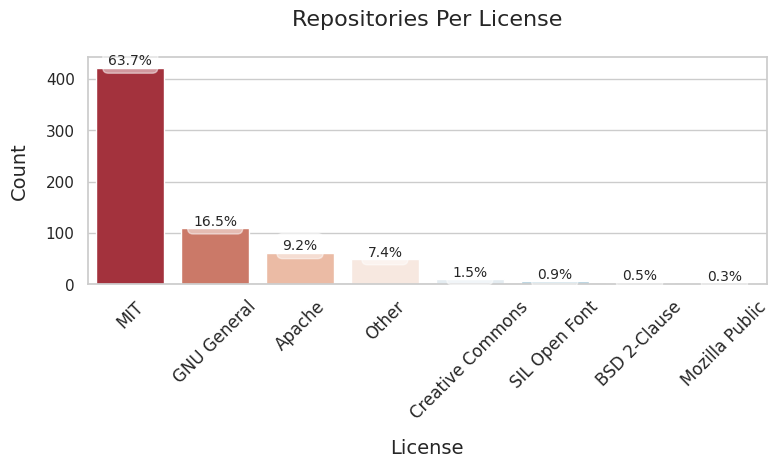

In [638]:
utils.bar_plot(license_df, figsize=(8,5), rotation = 45)

#### **Key Observation** 👀

1. **MIT License Dominance**: Most popular with **422** occurrences.
2. **Significant GNU General Usage**: Holds **109** instances, indicating interest in copyleft licenses.
3. **Diverse but Lesser-Known Licenses**: Licenses like **Apache** (61), **Other** (49), and **Creative Commons** (10) are less popular.
4. **Minimal Specialized Licenses**: Very low counts for **SIL Open Font** (6), **BSD 2-Clause** (3), and **Mozilla Public** (2).

#### **Conclusions** 💡
- The **MIT License** is favored for its simplicity and flexibility 🔑.
- The **GNU General** licenses emphasize a commitment to software freedom ✊.
- Most projects prefer established licenses for clarity and community acceptance ✅.

---
### Question 12: CI/CD Integration

**CI/CD Integration: Number of projects utilizing CI/CD.**


* Use the `ci_cd_tool` field to identify projects that have CI/CD integration.
* Analyze the distribution of CI/CD tools across the projects. 

In [ ]:
no_ci_cd_count = data['ci_cd_tool'].isna().sum()
ci_cd_count = len(data) - ci_cd_count

data = [ci_cd_count, no_ci_cd_count]
labels = ['With CI/CD', 'Without CI/CD']

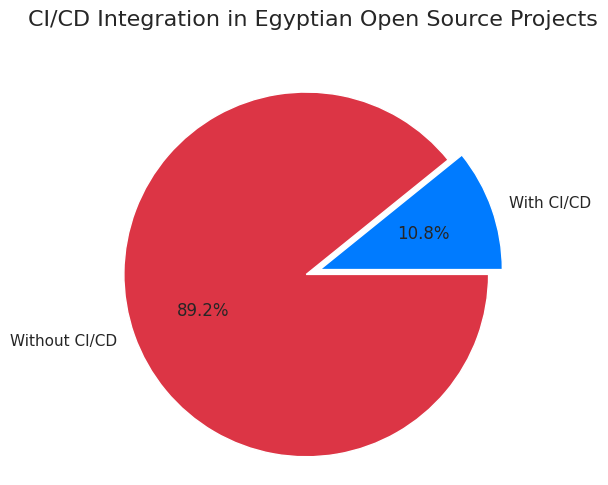

In [ ]:
plt.figure(figsize=(6, 5))

explode = [0, 0.08]
plt.pie(data, labels=labels, explode=explode, autopct='%1.1f%%',
        colors=['#007bff', '#dc3545'])  # Green for "With CI/CD", Red for "Without CI/CD"

plt.title("CI/CD Integration in Egyptian Open Source Projects",
          y=1.1, fontsize=16)

plt.axis('equal')
plt.tight_layout()
plt.show()

#### **OBSERVATION** 💡
The pie chart actually shows that 89.2% of Egyptian open source projects DO NOT utilize CI/CD tools. 

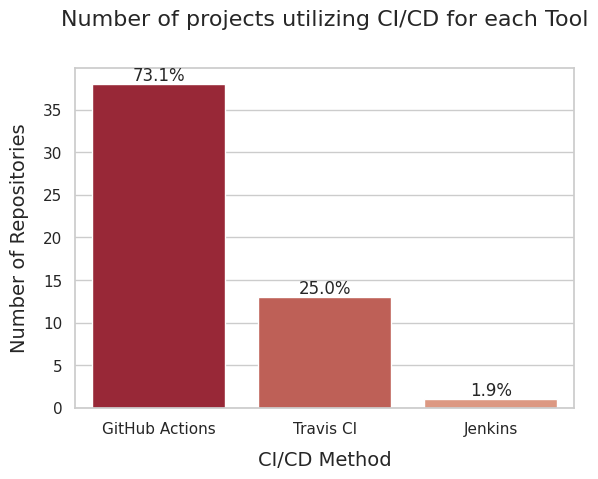

In [ ]:
fig, ax = plt.subplots(1, figsize=(6, 5))

bar_plot = sns.countplot(x='ci_cd_tool', data=data,
                         ax=ax,  palette=sns.color_palette("RdBu", 10))

plt.title("Number of projects utilizing CI/CD for each Tool", y=1.1, fontsize=16)
plt.xlabel("CI/CD Method", fontsize=14, labelpad=10)
plt.ylabel("Number of Repositories", fontsize=14, labelpad=10)
plt.tight_layout()


# Add percentage labels on top of the bars
total = ci_cd_count_df['count'].sum()

for p in bar_plot.patches:
    percentage = f'{(p.get_height() / total) * 100:.1f}%'
    bar_plot.annotate(percentage,
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='bottom', fontsize=12)

plt.show()

#### **Key Observation**👀

The analysis of CI/CD tool usage in Egyptian open source projects reveals the following insights:

- GitHub Actions (38) is the most popular CI/CD tool, indicating its widespread adoption among Egyptian developers. This is likely due to its integration with GitHub, its ease of use, and its growing popularity in the CI/CD systems.
- Travis CI (13) is the second most commonly used CI/CD tool, indicating a level of familiarity and preference among a portion of the community. 
- Jenkins (1) has very limited usage, suggesting it is not a primary choice for CI/CD integration in Egyptian open source projects. While Jenkins is a powerful and highly customizable tool, its setup and configuration can be more complex.